<a href="https://colab.research.google.com/github/manish284/Machine-Learning/blob/master/Loan_Status_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem statement**

This is a classification problem, where you are supposed to find loan payment status after one year of issue date (issue_d) . Loan terms are 36 months or 60 months. You are free to use any machine learning technique or group of techniques, deep learning.

**Objective**

Find loan payment status after one year.
Target variable – loan status

**Note for submission**

When sending the result, use of confusion matrix, accuracy, model gains, variable important, methodology for modelling, prediction, prediction probability, various insights and champion challenger in python or R is mandatory. *italicized text*


Data Loading


---
1. Loading data From  google drive

Data Analysis


---
1. Missing Values
2. Numerical Feature
    1. Temporal Feature
    2. Discrete Feature
    3. Continuous Feature
3. Outliers. 
4. Categorical Feature


Fetature Engineering


---
1. Temporal Feature
2. Missing Values
    1. Categorical
    2. Numerical
3. NUmerical Feature
4. Categorical Feature
  1. Label Encoder
  2. One Hot Encoder
4. Fetaure Scaling


Feature Selection

---
1. Heat Map 
2. Lasso and feature_selection

Model Building

---
1. Logistic regression
2. random Forest
3. Adabost Classifier


---
Validation

---
1. Confusion Matrix
2. Cross Validation


**Loading Dataset from Goggle Drive.**

In [ ]:
# copy data from goodle drive to colab notebook
!cp "/content/drive/MyDrive/ML-Exam (1).zip" /content/Data

In [ ]:
# unzip the data in working directory
!unzip "/content/Data/ML-Exam (1).zip" -d /content/Data/

Archive:  /content/Data/ML-Exam (1).zip
replace /content/Data/DataDictionary.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/Data/DataDictionary.xlsx  
replace /content/Data/Sample-Data.xlsb? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/Data/Sample-Data.xlsb  


**Data Analysis**


---
1. Missing Values
2. Numerical Feature
    1. Temporal Feature
    2. Discrete Feature
    3. Continuous Feature
3. Outliers. 
4. Categorical Feature



In [ ]:
#Import required libraries for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [ ]:
# Note- to read xlsb file using panda need to insttal 'pyxlsb'
!pip3 install pyxlsb

In [ ]:
#load the sample data from excel to dataset variable
dataset = pd.read_excel("/content/Data/Sample-Data.xlsb", engine='pyxlsb')

In [ ]:
# print the shape of dataset
dataset.shape

(29503, 106)

In [ ]:
# print top 5 record
dataset.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag
0,40000,40000,40000.0,60 months,16.99,993.89,D,D1,Product Regulatory Specialist,< 1 year,MORTGAGE,100000.0,Verified,Jan-2017,Fully Paid,n,debt_consolidation,Debt consolidation,460xx,IN,18.86,0,Oct-1997,2,NaN,NaN,15,0,21627,40.3,32,w,0.00,0.00,45744.472768,45744.47,40000.00,5744.47,0.0,0.0,0.0,Nov-2017,36837.22,NaN,Dec-2018,0.0,NaN,1,Joint App,0,0.0,95327.0,0.0,6.0,0.0,1.0,15.0,73700.0,88.0,0.0,3.0,11892.0,69.0,53600.0,0.0,0.0,4.0,4.0,6355.0,30949.0,38.3,0.0,0,157.0,231.0,20.0,15.0,1.0,20.0,NaN,1.0,NaN,0.0,5.0,6.0,8.0,15.0,12.0,9.0,19.0,6.0,15.0,0.0,0.0,0.0,0.0,100.0,12.5,0.0,0.0,137720.0,95327.0,50200.0,84120.0,Cash,N
1,12000,12000,12000.0,60 months,10.42,257.46,B,B3,Ass't Manger,10+ years,MORTGAGE,45000.0,Verified,Aug-2017,Current,n,credit_card,Credit card refinancing,359xx,AL,19.97,0,Aug-1974,1,67.0,NaN,14,0,17861,59.0,26,f,9027.96,9027.96,4637.760000,4637.76,2972.04,1665.72,0.0,0.0,0.0,Feb-2019,257.46,Mar-2019,Feb-2019,0.0,NaN,1,Individual,0,0.0,21097.0,1.0,1.0,1.0,1.0,7.0,3236.0,92.0,3.0,5.0,4695.0,59.0,30090.0,0.0,1.0,2.0,6.0,1917.0,2048.0,83.0,0.0,0,350.0,516.0,5.0,5.0,1.0,5.0,67.0,5.0,67.0,0.0,4.0,10.0,6.0,8.0,4.0,10.0,22.0,8.0,11.0,NaN,0.0,0.0,4.0,88.0,75.0,0.0,0.0,33590.0,22017.0,8190.0,3500.0,Cash,N
2,15000,15000,15000.0,36 months,8.90,476.30,A,A5,Project Manager,< 1 year,RENT,65000.0,Not Verified,Nov-2013,Fully Paid,n,debt_consolidation,Debt consolidation,752xx,TX,24.19,0,Aug-2001,1,NaN,NaN,17,0,10666,29.3,36,w,0.00,0.00,17146.725104,17146.73,15000.00,2146.73,0.0,0.0,0.0,Nov-2016,476.22,NaN,Sep-2018,0.0,NaN,1,Individual,0,0.0,61898.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36400.0,NaN,NaN,NaN,4.0,3641.0,17965.0,35.8,0.0,0,145.0,146.0,1.0,1.0,0.0,1.0,NaN,6.0,NaN,0.0,6.0,8.0,7.0,12.0,15.0,11.0,21.0,8.0,17.0,0.0,0.0,0.0,4.0,100.0,28.6,0.0,0.0,99814.0,61898.0,28000.0,63414.0,Cash,N
3,15000,15000,15000.0,60 months,16.14,365.89,C,C4,Freight Cordinator,10+ years,RENT,42240.0,Source Verified,Sep-2018,Current,n,debt_consolidation,Debt consolidation,958xx,CA,24.35,0,Oct-2006,0,NaN,NaN,6,0,8074,67.3,13,w,14156.92,14156.92,1889.980000,1889.98,843.08,1046.90,0.0,0.0,0.0,Feb-2019,365.89,Mar-2019,Feb-2019,0.0,NaN,1,Joint App,0,0.0,35867.0,0.0,2.0,0.0,1.0,17.0,27793.0,65.0,0.0,0.0,5459.0,66.0,12000.0,0.0,3.0,0.0,1.0,5978.0,3426.0,70.2,0.0,0,136.0,143.0,27.0,17.0,0.0,55.0,NaN,17.0,NaN,0.0,2.0,2.0,3.0,5.0,7.0,4.0,6.0,2.0,6.0,0.0,0.0,0.0,0.0,100.0,33.3,0.0,0.0,54470.0,35867.0,11500.0,42470.0,Cash,N
4,12000,12000,120

In [ ]:
#print columns of dataset
print(dataset.columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object', length=106)


1. Missing Values

---


In [ ]:
## checking the percentage of nan values present in each feature
## make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  '% missing values')

emp_title 0.0716 % missing values
emp_length 0.0624 % missing values
title 0.0108 % missing values
dti 0.0007 % missing values
mths_since_last_delinq 0.5153 % missing values
mths_since_last_record 0.8391 % missing values
revol_util 0.0006 % missing values
last_pymnt_d 0.0011 % missing values
next_pymnt_d 0.581 % missing values
collections_12_mths_ex_med 0.0001 % missing values
mths_since_last_major_derog 0.744 % missing values
tot_coll_amt 0.0299 % missing values
tot_cur_bal 0.0299 % missing values
open_acc_6m 0.3877 % missing values
open_act_il 0.3877 % missing values
open_il_12m 0.3877 % missing values
open_il_24m 0.3877 % missing values
mths_since_rcnt_il 0.4071 % missing values
total_bal_il 0.3877 % missing values
il_util 0.4774 % missing values
open_rv_12m 0.3877 % missing values
open_rv_24m 0.3877 % missing values
max_bal_bc 0.3877 % missing values
all_util 0.3878 % missing values
total_rev_hi_lim 0.0299 % missing values
inq_fi 0.3877 % missing values
total_cu_tl 0.3877 % missing

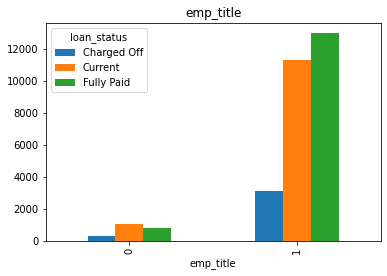

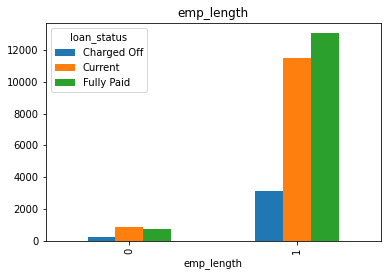

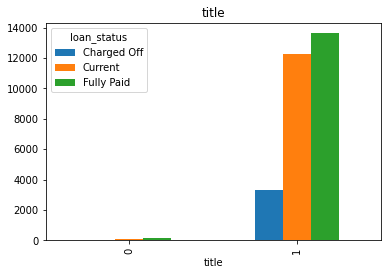

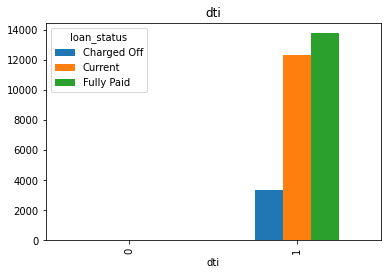

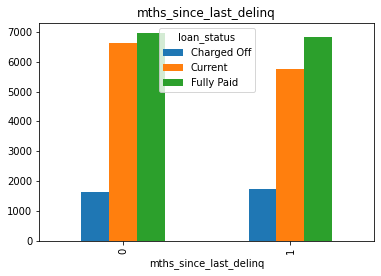

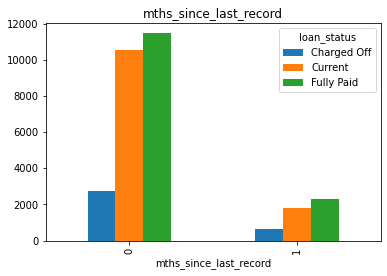

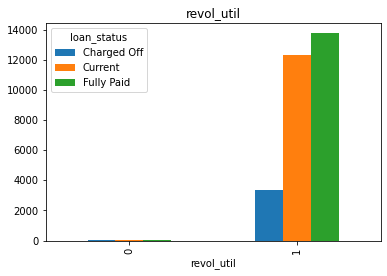

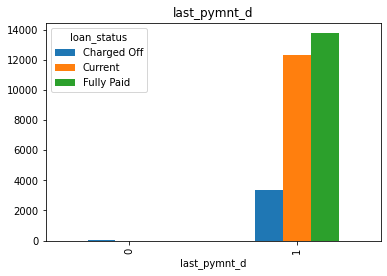

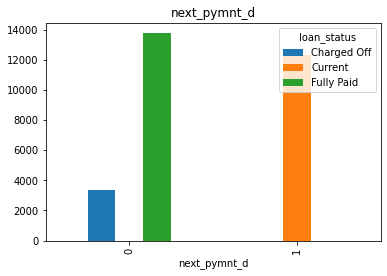

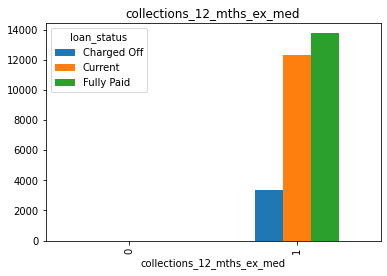

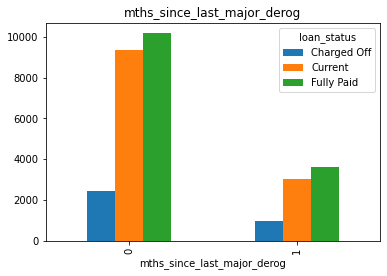

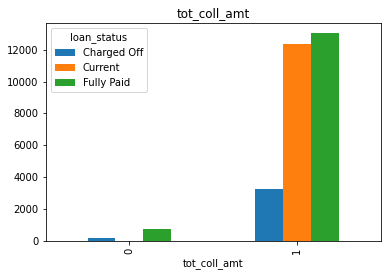

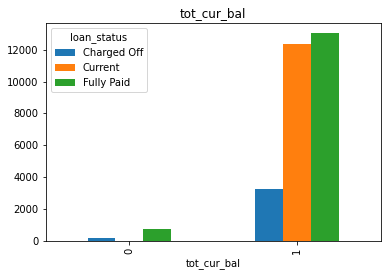

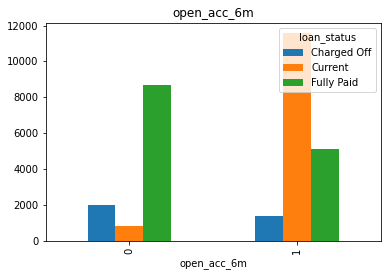

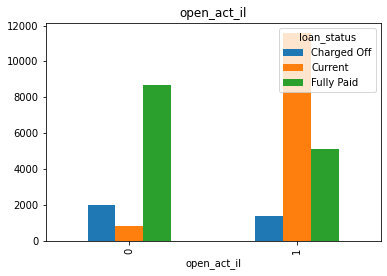

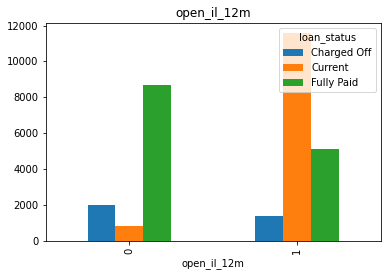

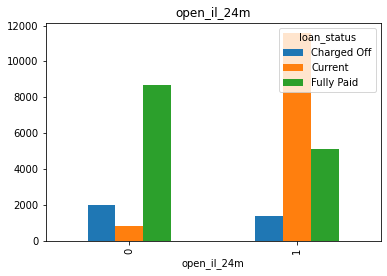

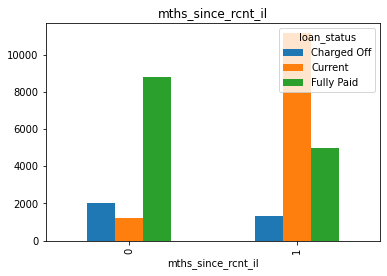

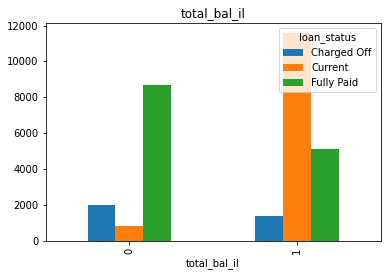

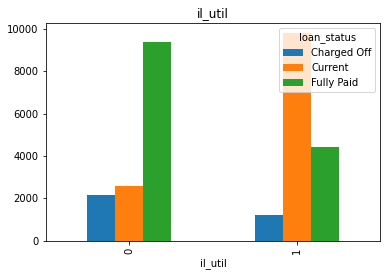

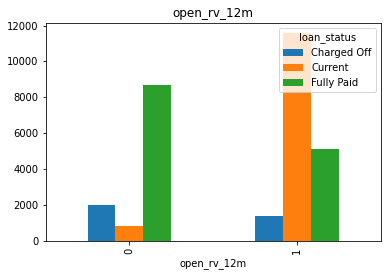

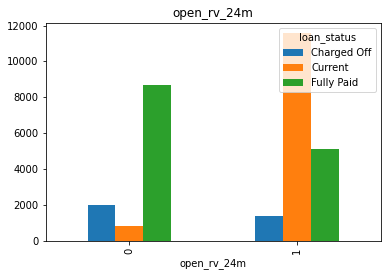

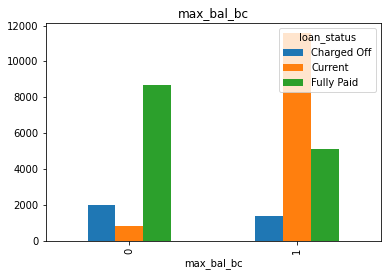

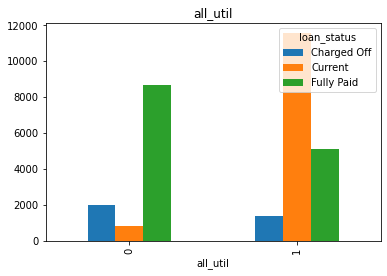

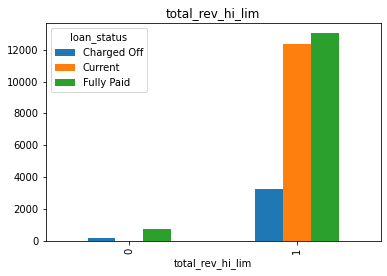

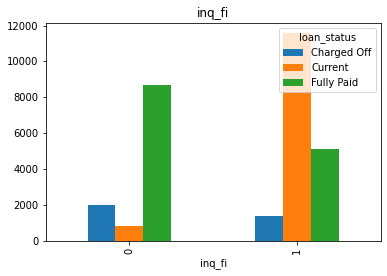

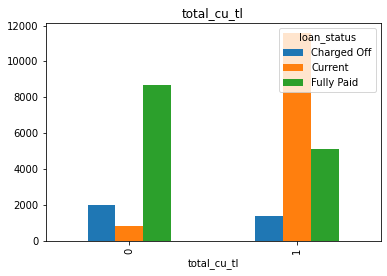

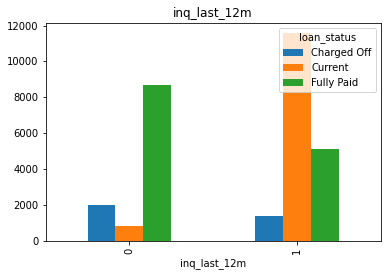

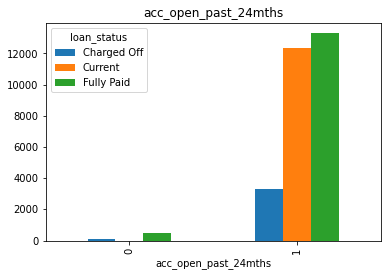

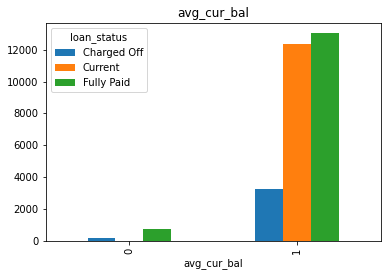

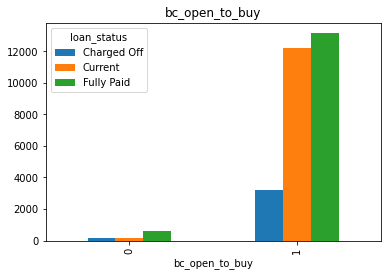

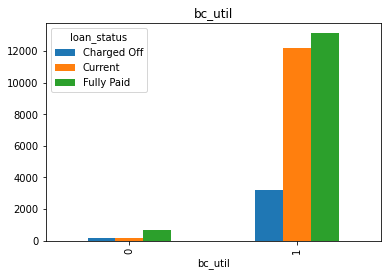

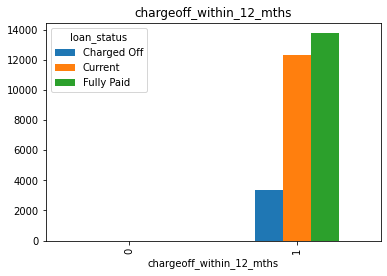

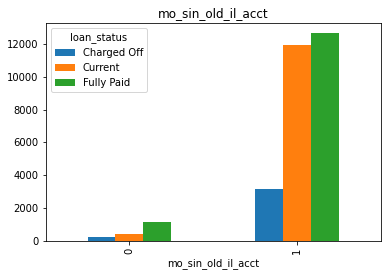

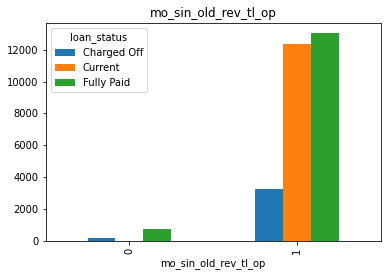

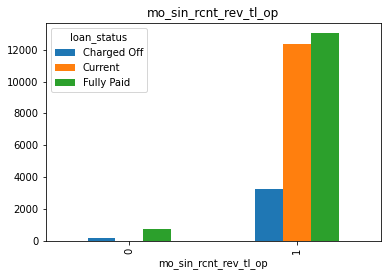

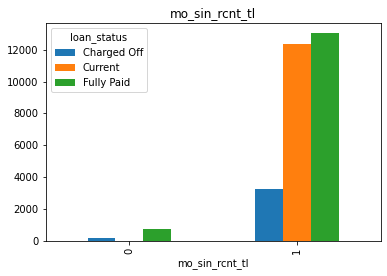

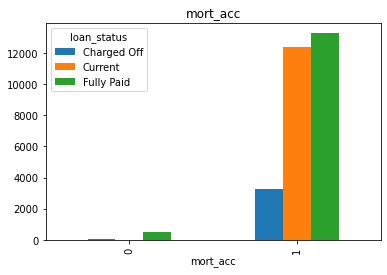

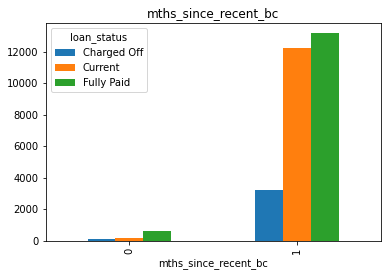

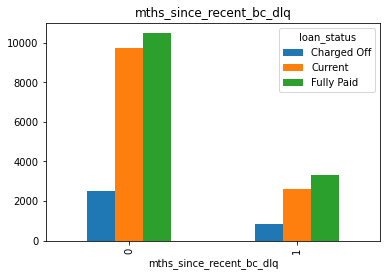

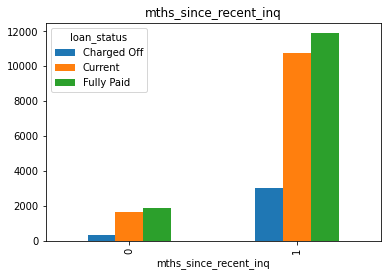

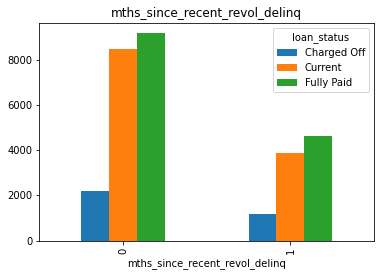

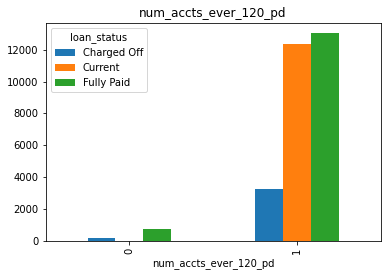

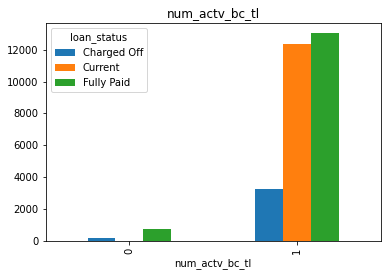

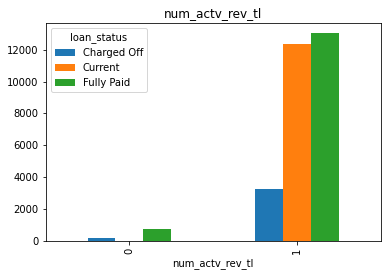

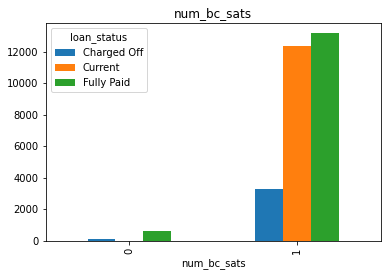

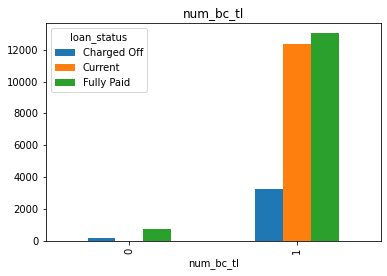

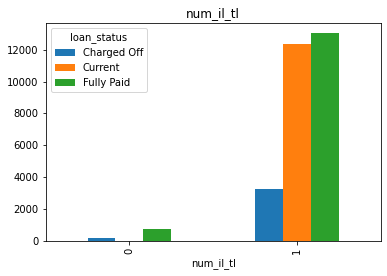

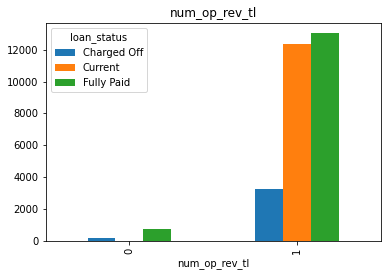

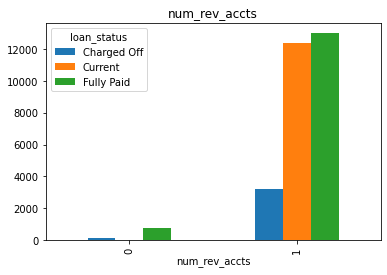

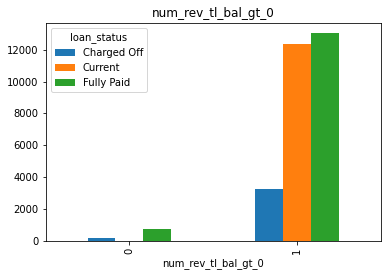

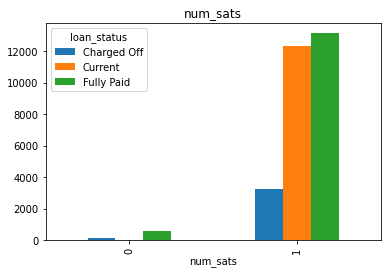

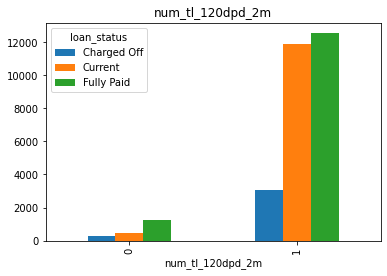

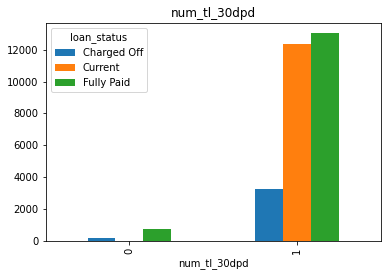

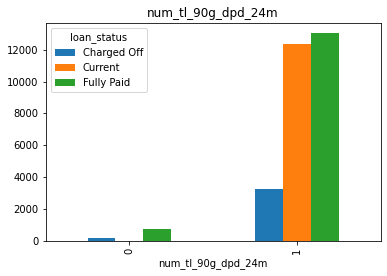

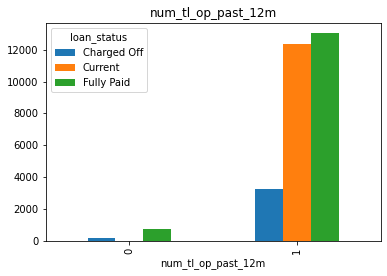

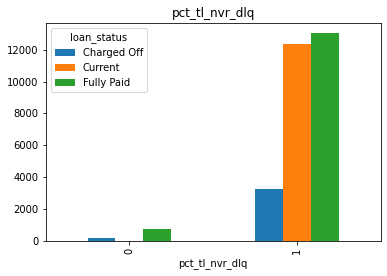

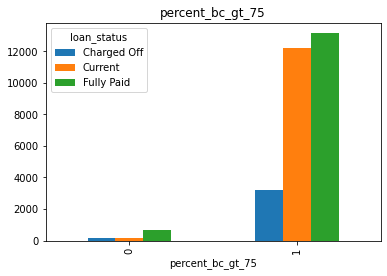

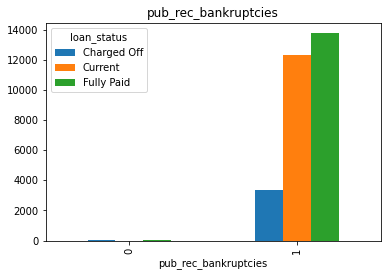

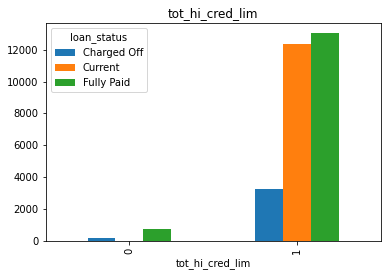

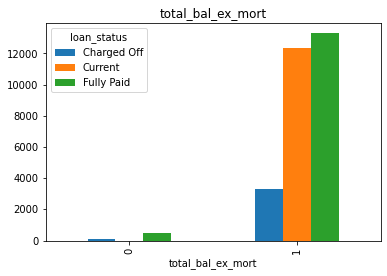

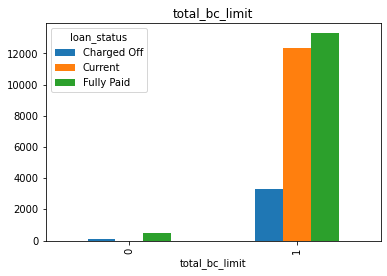

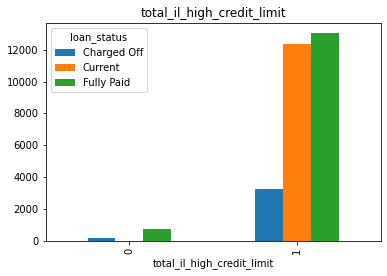

In [ ]:
#ploting some diagram for see the relationship between features and loan status
for feature in features_with_na:
    data = dataset.copy() 

    # makei a variable that indicates 0 if the observation was missing or zero otherwise 1
    data[feature] = np.where(data[feature].isnull(), 0, 1)

    # let's calculate the count loan status where the information is missing or present
    pd.crosstab(data[feature],data.loan_status).plot.bar()
    plt.title(feature)
    plt.show()

2. Numerical Variables

---

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# show the numerical variables values
dataset[numerical_features].head()

Number of numerical variables:  84


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,40000,40000,40000.0,16.99,993.89,100000.0,18.86,0,2,NaN,NaN,15,0,21627,40.3,32,0.00,0.00,45744.472768,45744.47,40000.00,5744.47,0.0,0.0,0.0,36837.22,0.0,NaN,1,0,0.0,95327.0,0.0,6.0,0.0,1.0,15.0,73700.0,88.0,0.0,3.0,11892.0,69.0,53600.0,0.0,0.0,4.0,4.0,6355.0,30949.0,38.3,0.0,0,157.0,231.0,20.0,15.0,1.0,20.0,NaN,1.0,NaN,0.0,5.0,6.0,8.0,15.0,12.0,9.0,19.0,6.0,15.0,0.0,0.0,0.0,0.0,100.0,12.5,0.0,0.0,137720.0,95327.0,50200.0,84120.0
1,12000,12000,12000.0,10.42,257.46,45000.0,19.97,0,1,67.0,NaN,14,0,17861,59.0,26,9027.96,9027.96,4637.760000,4637.76,2972.04,1665.72,0.0,0.0,0.0,257.46,0.0,NaN,1,0,0.0,21097.0,1.0,1.0,1.0,1.0,7.0,3236.0,92.0,3.0,5.0,4695.0,59.0,30090.0,0.0,1.0,2.0,6.0,1917.0,2048.0,83.0,0.0,0,350.0,516.0,5.0,5.0,1.0,5.0,67.0,5.0,67.0,0.0,4.0,10.0,6.0,8.0,4.0,10.0,22.0,8.0,11.0,NaN,0.0,0.0,4.0,88.0,75.0,0.0,0.0,33590.0,22017.0,8190.0,3500.0
2,15000,15000,15000.0,8.90,476.30,65000.0,24.19,0,1,NaN,NaN,17,0,10666,29.3,36,0.00,0.00,17146.725104,17146.73,15000.00,2146.73,0.0,0.0,0.0,476.22,0.0,NaN,1,0,0.0,61898.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36400.0,NaN,NaN,NaN,4.0,3641.0,17965.0,35.8,0.0,0,145.0,146.0,1.0,1.0,0.0,1.0,NaN,6.0,NaN,0.0,6.0,8.0,7.0,12.0,15.0,11.0,21.0,8.0,17.0,0.0,0.0,0.0,4.0,100.0,28.6,0.0,0.0,99814.0,61898.0,28000.0,63414.0
3,15000,15000,15000.0,16.14,365.89,42240.0,24.35,0,0,NaN,NaN,6,0,8074,67.3,13,14156.92,14156.92,1889.980000,1889.98,843.08,1046.90,0.0,0.0,0.0,365.89,0.0,NaN,1,0,0.0,35867.0,0.0,2.0,0.0,1.0,17.0,27793.0,65.0,0.0,0.0,5459.0,66.0,12000.0,0.0,3.0,0.0,1.0,5978.0,3426.0,70.2,0.0,0,136.0,143.0,27.0,17.0,0.0,55.0,NaN,17.0,NaN,0.0,2.0,2.0,3.0,5.0,7.0,4.0,6.0,2.0,6.0,0.0,0.0,0.0,0.0,100.0,33.3,0.0,0.0,54470.0,35867.0,11500.0,42470.0
4,12000,12000,12000.0,19.42,442.43,50500.0,24.43,0,1,NaN,NaN,18,0,8974,35.8,23,9328.90,9328.90,4411.350000,4411.35,2671.10,1740.25,0.0,0.0,0.0,442.43,0.0,NaN,1,0,0.0,25618.0,2.0,2.0,1.0,3.0,5.0,16644.0,85.0,2.0,4.0,5158.0,57.0,25100.0,1.0,5.0,1.0,7.0,1507.0,12761.0,33.9,0.0,0,38.0,181.0,5.0,5.0,0.0,5.0,NaN,0.0,NaN,0.0,7.0,9.0,10.0,11.0,5.0,16.0,18.0,9.0,18.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,44686.0,25618.0,19300.0,19586.0


Temporal Feature

---

In [ ]:
# list of variables that contain year information
#year_feature = [feature for feature in numerical_features if 'Yr' in feature]
year_feature = ['term', 'emp_length', 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d' ]
year_feature

['term',
 'emp_length',
 'issue_d',
 'earliest_cr_line',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

In [ ]:
# explore the content of these year variables
for feature in year_feature:
    print(feature, dataset[feature].unique())

term [' 60 months' ' 36 months']
emp_length ['< 1 year' '10+ years' '5 years' '4 years' nan '2 years' '8 years'
 '9 years' '6 years' '3 years' '1 year' '7 years']
issue_d ['Jan-2017' 'Aug-2017' 'Nov-2013' 'Sep-2018' 'Apr-2018' 'Apr-2014'
 'Jan-2018' 'Sep-2016' 'Dec-2018' 'Nov-2011' 'Nov-2015' 'Sep-2017'
 'Apr-2016' 'Jun-2018' 'Jul-2016' 'Aug-2014' 'Oct-2013' 'Feb-2015'
 'Dec-2016' 'Dec-2014' 'Aug-2018' 'Jan-2012' 'May-2014' 'Nov-2018'
 'May-2015' 'Jul-2014' 'Nov-2014' 'Jul-2013' 'Oct-2018' 'Jun-2017'
 'Apr-2017' 'Nov-2017' 'Oct-2016' 'Sep-2010' 'Mar-2012' 'Mar-2016'
 'Feb-2017' 'Nov-2012' 'Jul-2017' 'Mar-2014' 'Mar-2015' 'Dec-2012'
 'Mar-2018' 'Apr-2015' 'Oct-2007' 'Jul-2018' 'Apr-2013' 'Nov-2010'
 'May-2013' 'Dec-2015' 'May-2018' 'Oct-2014' 'Jun-2016' 'Feb-2016'
 'Jul-2015' 'Sep-2015' 'Jun-2014' 'Mar-2017' 'Jun-2015' 'Oct-2015'
 'Aug-2016' 'May-2016' 'Jan-2014' 'Sep-2013' 'Jan-2015' 'Nov-2016'
 'Dec-2013' 'Sep-2012' 'Jan-2016' 'Dec-2017' 'May-2017' 'Feb-2014'
 'Feb-2013' 'Jan-2011' 'O

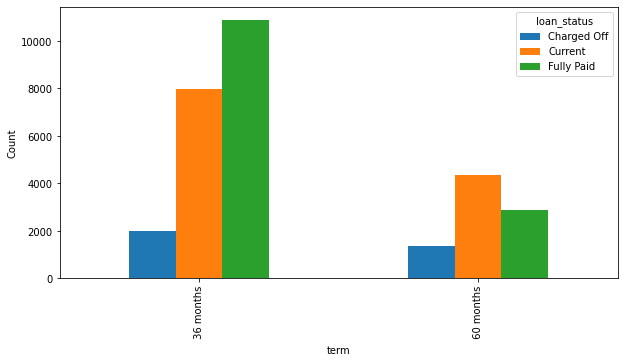

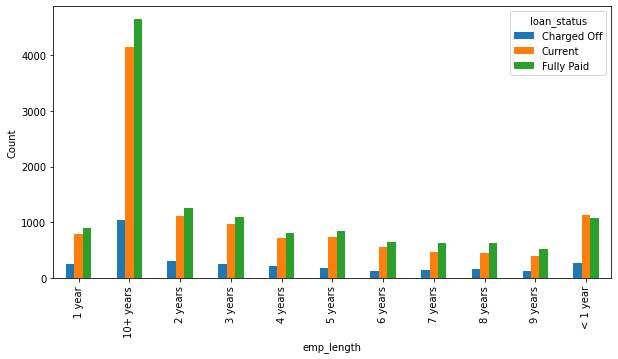

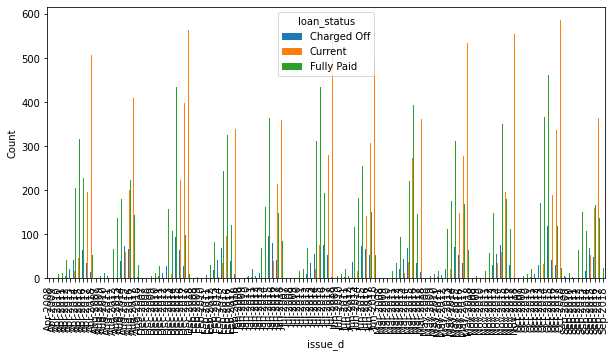

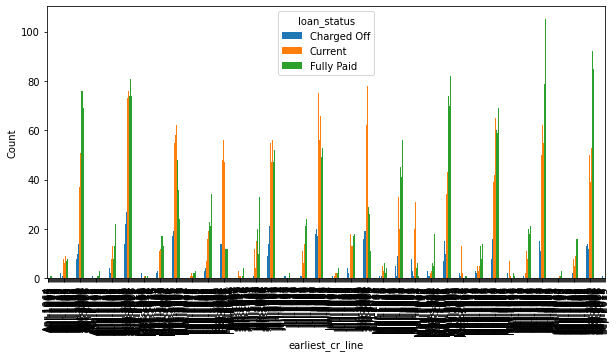

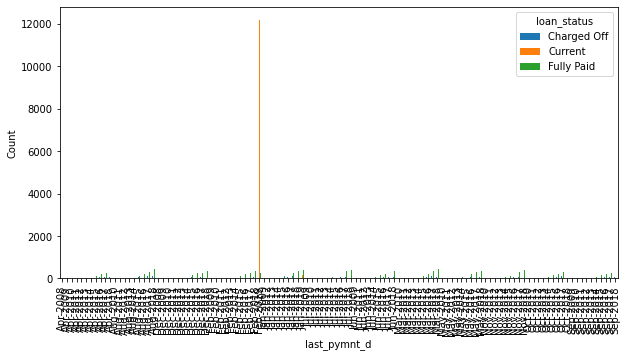

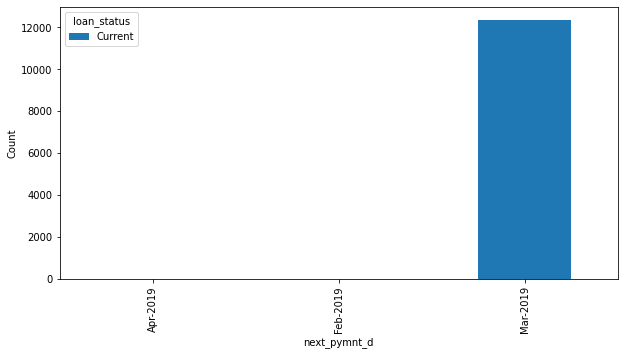

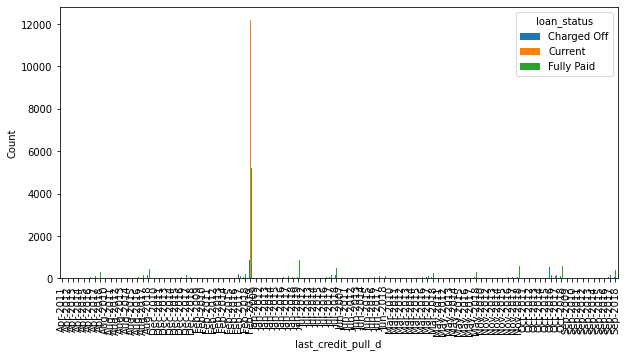

In [ ]:
#analyze the Temporal Datetime Variables
for feature in year_feature:
  pd.crosstab(data[feature],data.loan_status).plot.bar(figsize=(10,5))
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.show()

Discrete  Feature

---

In [ ]:
#list of all discrete feature
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 20


In [ ]:
# see the discrete feraure
discrete_feature

['delinq_2yrs',
 'inq_last_6mths',
 'pub_rec',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'open_acc_6m',
 'open_il_12m',
 'open_il_24m',
 'open_rv_12m',
 'inq_fi',
 'chargeoff_within_12_mths',
 'mort_acc',
 'num_accts_ever_120_pd',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pub_rec_bankruptcies',
 'tax_liens']

In [ ]:
#showing the descre feratures record
dataset[discrete_feature].head()

,delinq_2yrs,inq_last_6mths,pub_rec,collections_12_mths_ex_med,policy_code,acc_now_delinq,open_acc_6m,open_il_12m,open_il_24m,open_rv_12m,inq_fi,chargeoff_within_12_mths,mort_acc,num_accts_ever_120_pd,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pub_rec_bankruptcies,tax_liens
0,0,2,0,0.0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0,0.0,1,0,1.0,1.0,1.0,3.0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,4.0,0.0,0.0
2,0,1,0,0.0,1,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
3,0,0,0,0.0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0,0.0,1,0,2.0,1.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


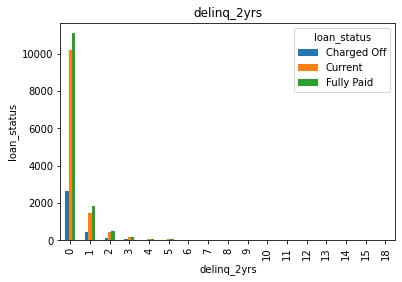

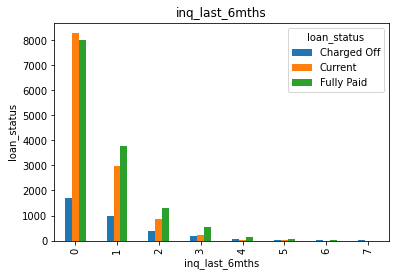

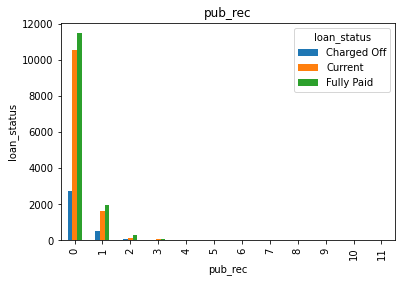

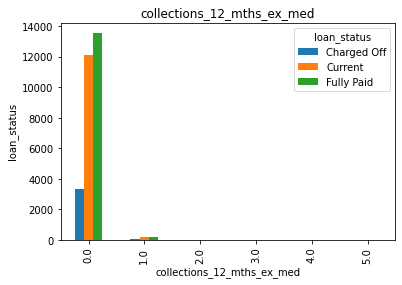

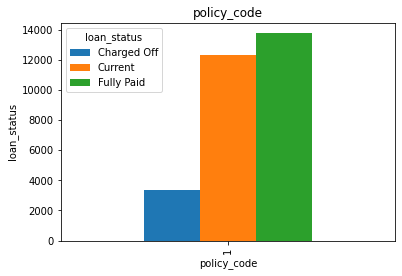

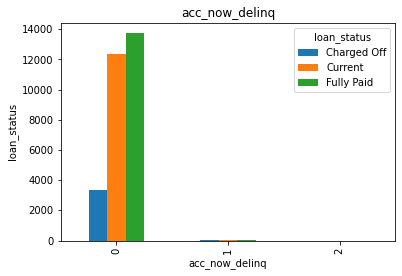

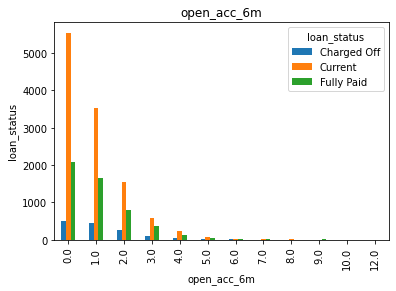

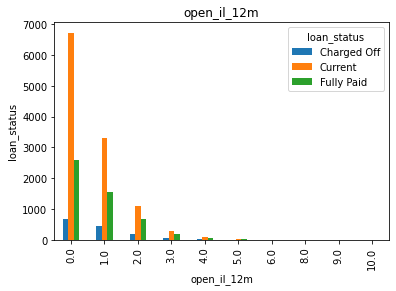

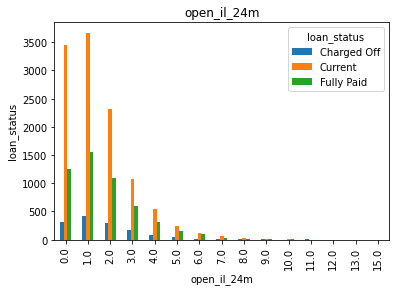

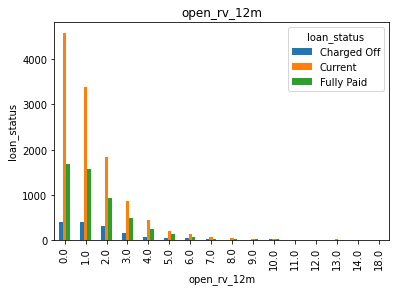

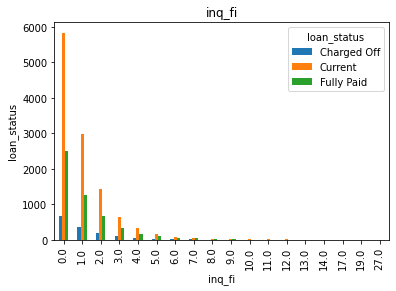

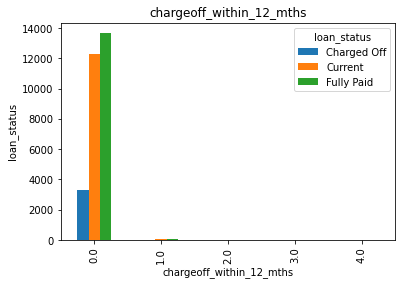

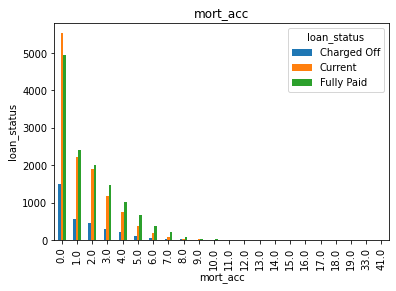

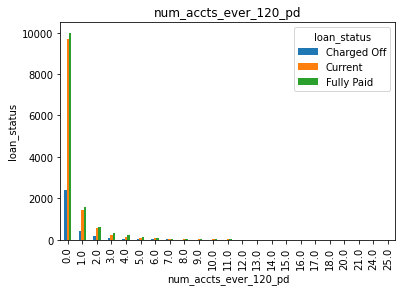

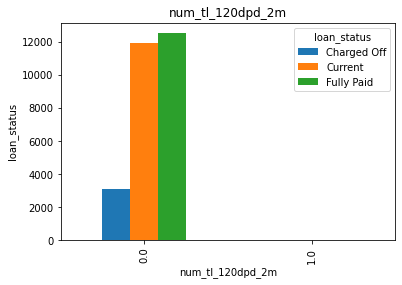

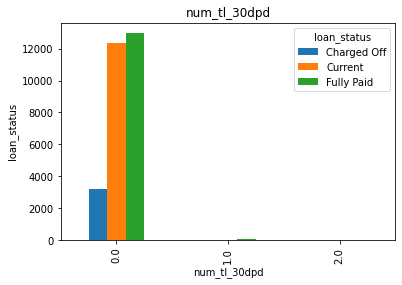

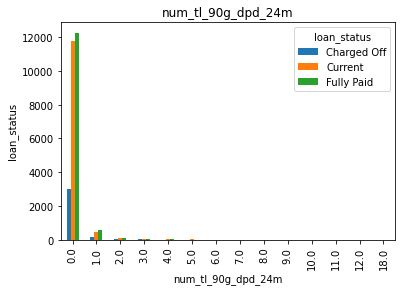

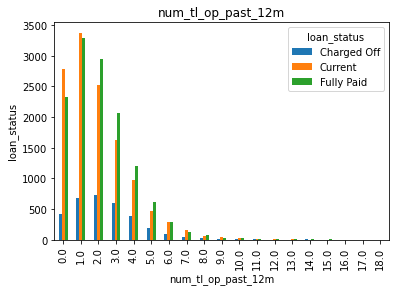

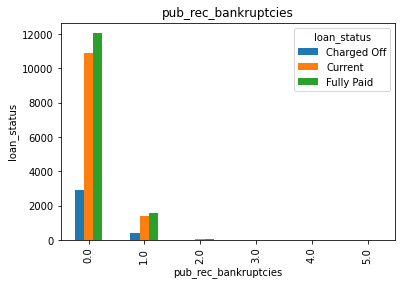

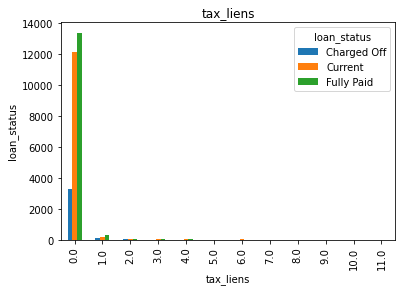

In [ ]:
# showing the realtionship between them and loan status
for feature in discrete_feature:
    data=dataset.copy()
    pd.crosstab(data[feature],data.loan_status).plot.bar()
    plt.xlabel(feature)
    plt.ylabel('loan_status')
    plt.title(feature)
    plt.show()

Continuous Feature

---

In [ ]:
#list of all continuous feature
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 64


In [ ]:
# showing the continuous feature
continuous_feature

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_act_il',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',


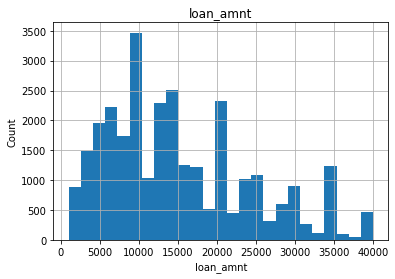

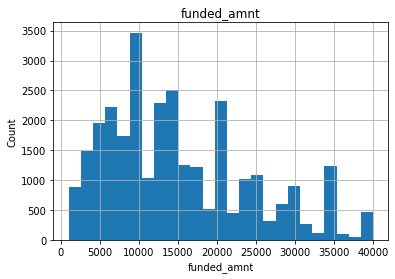

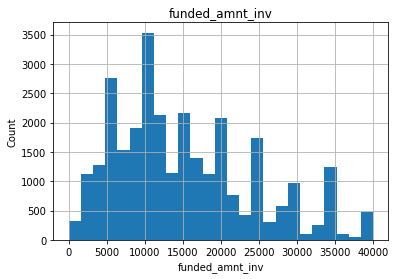

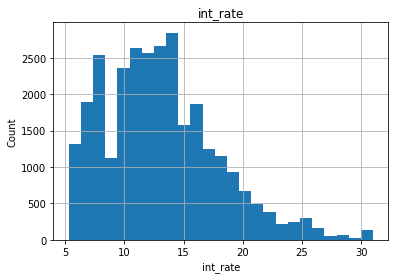

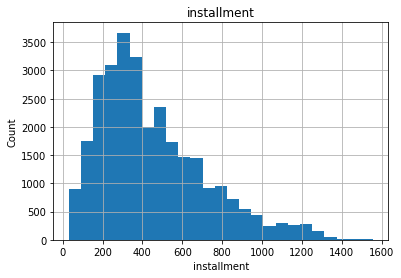

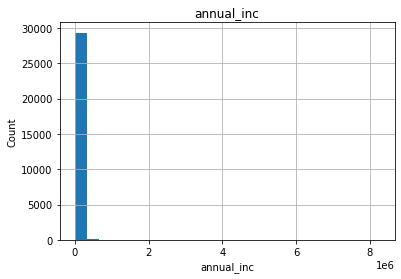

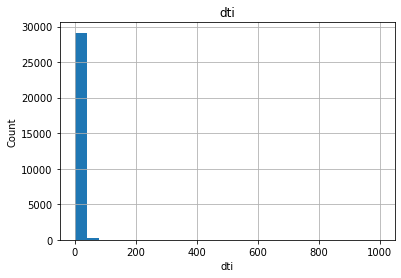

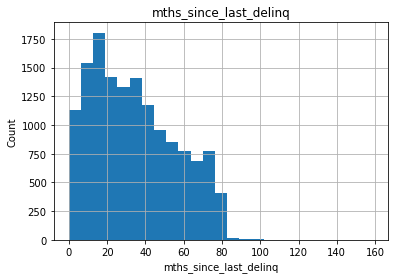

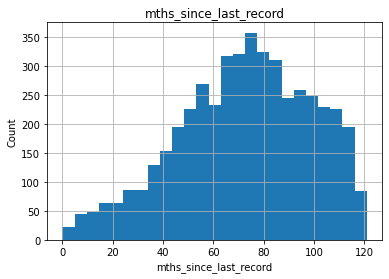

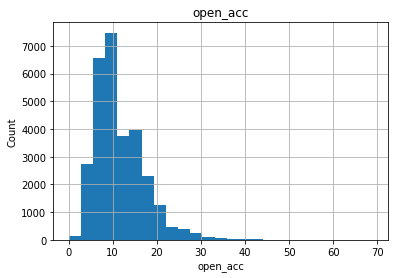

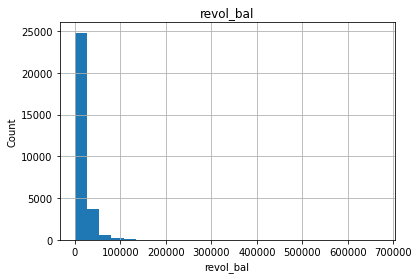

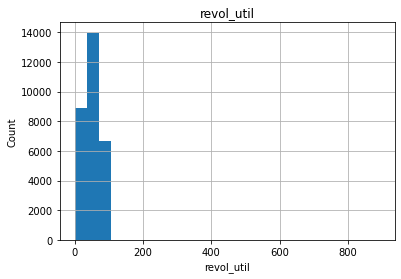

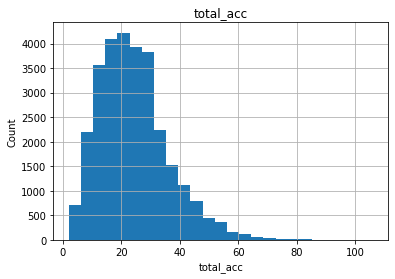

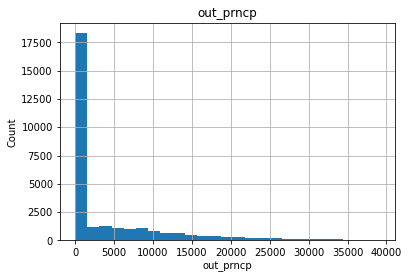

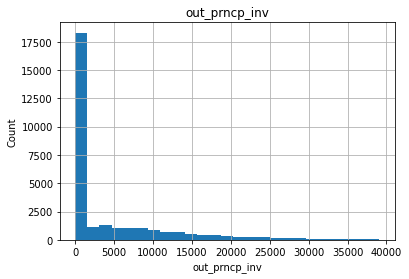

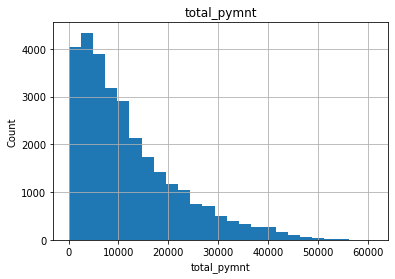

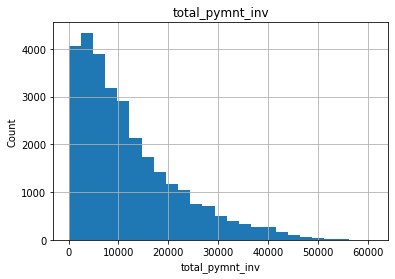

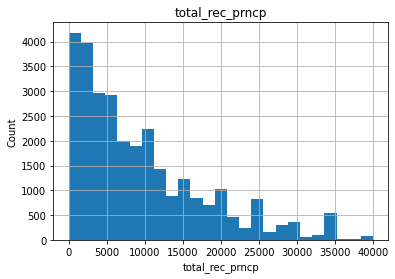

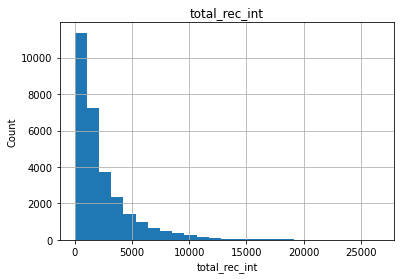

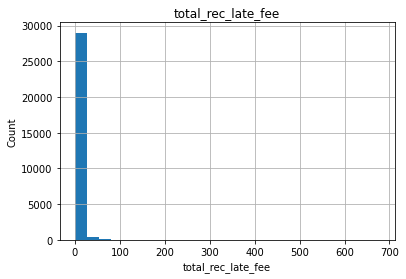

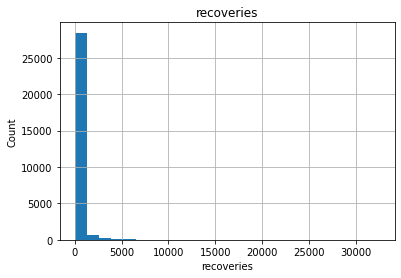

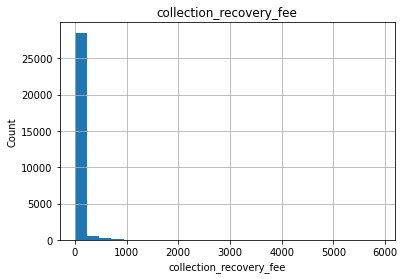

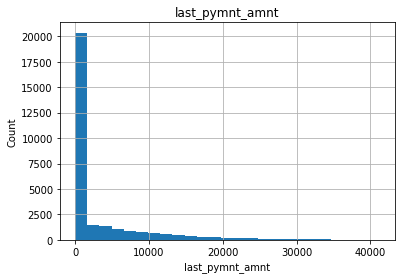

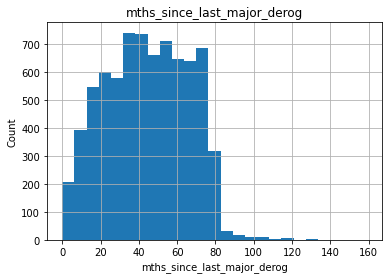

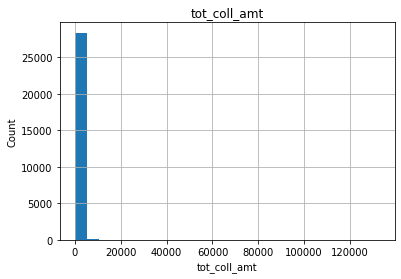

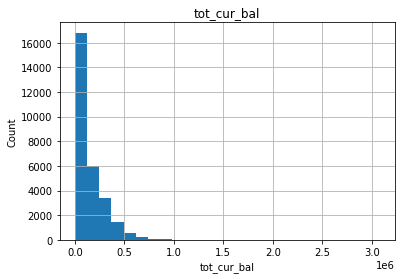

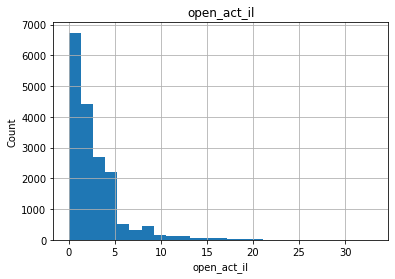

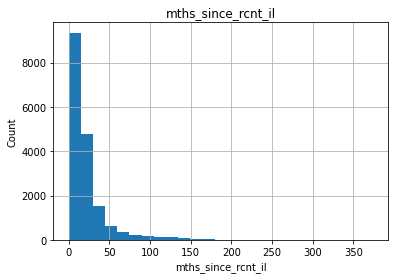

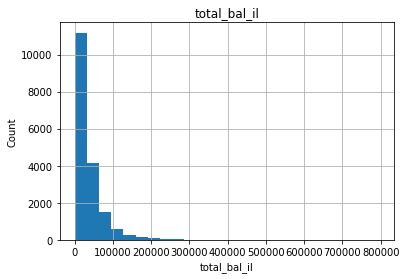

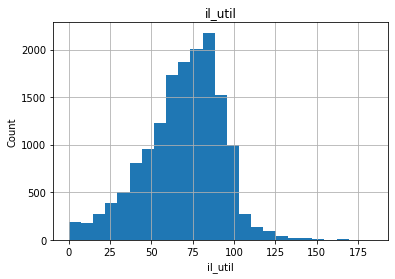

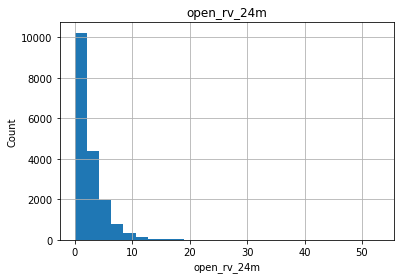

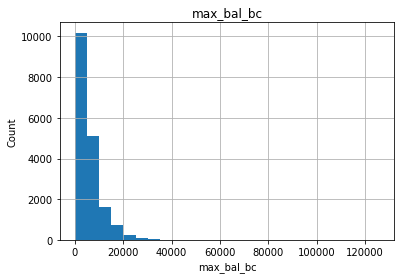

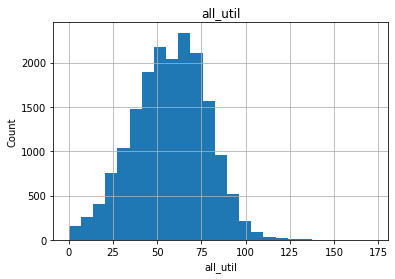

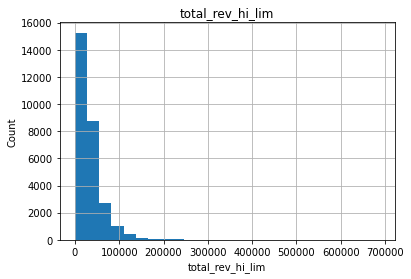

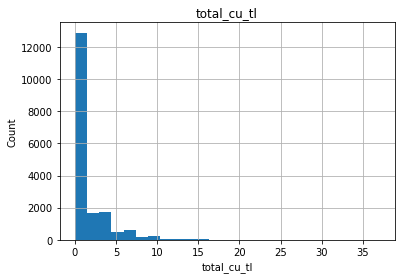

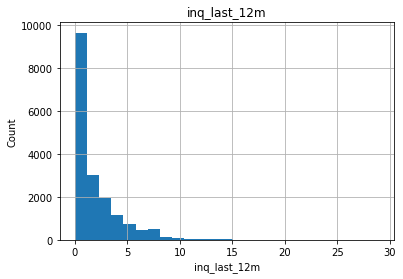

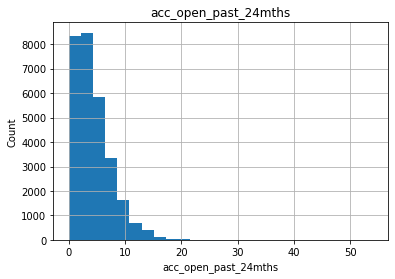

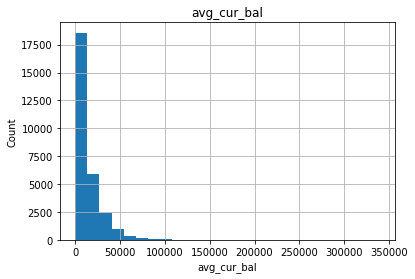

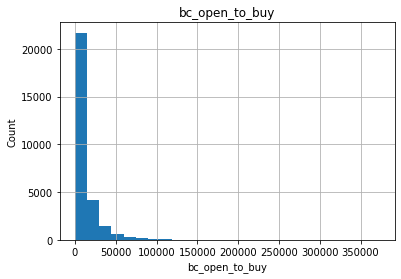

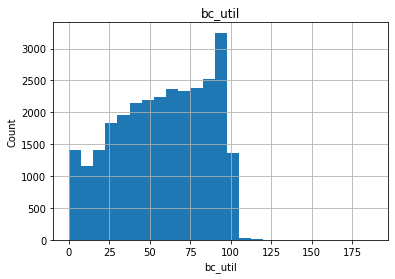

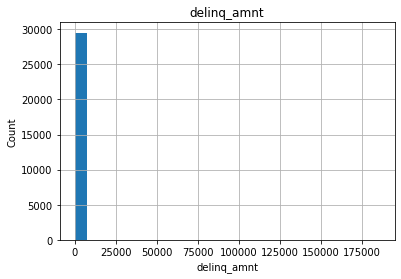

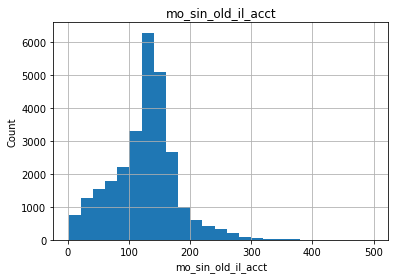

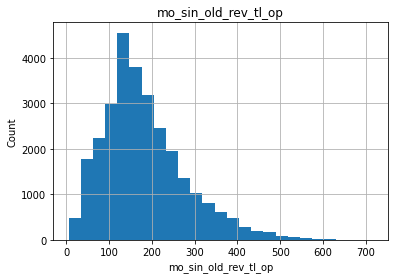

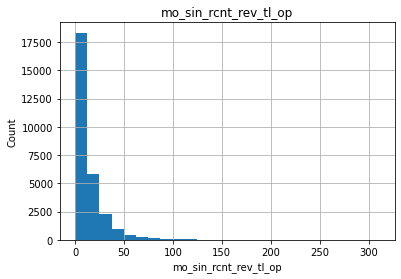

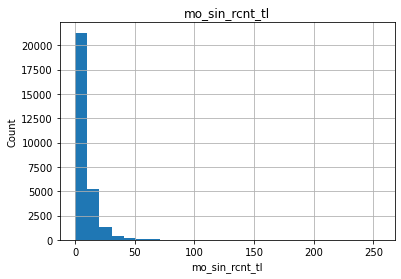

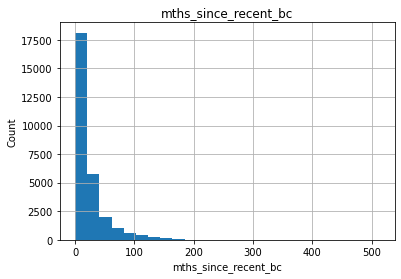

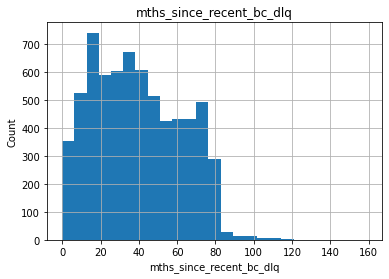

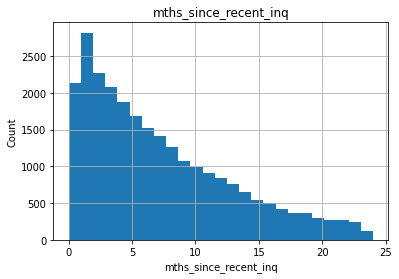

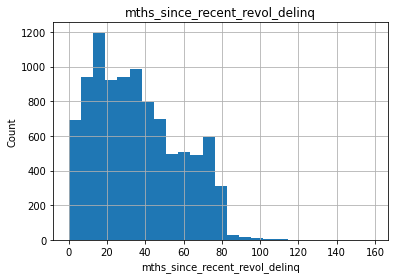

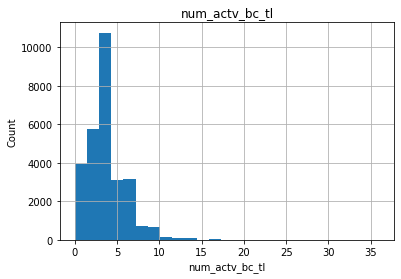

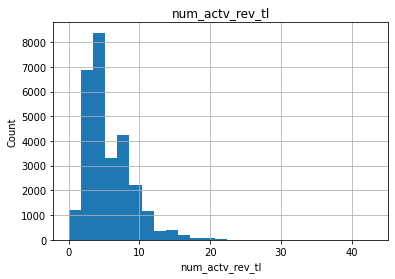

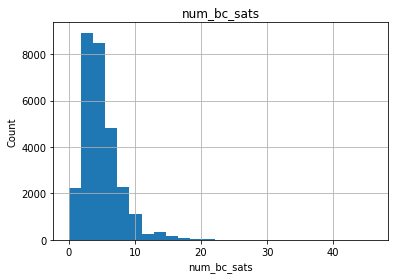

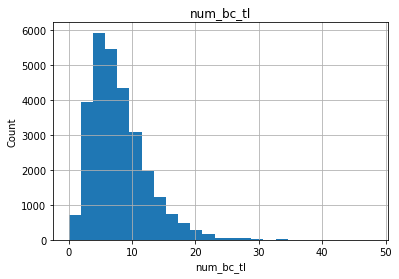

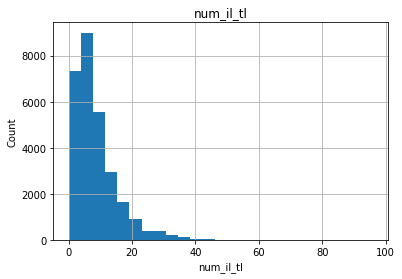

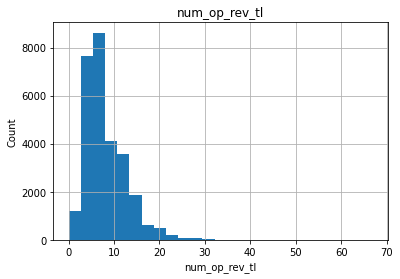

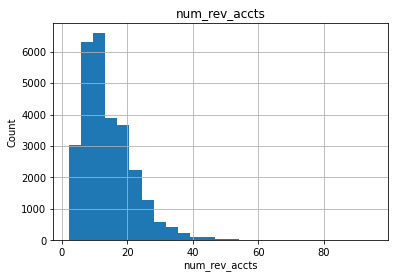

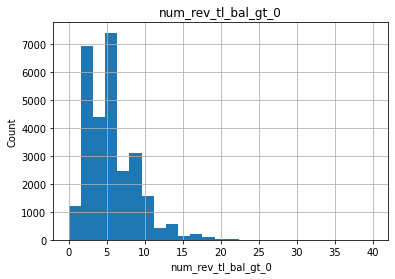

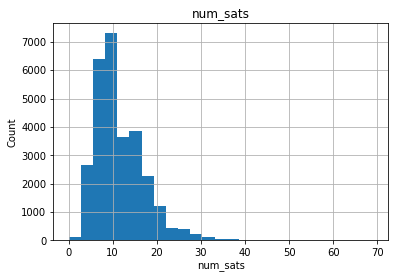

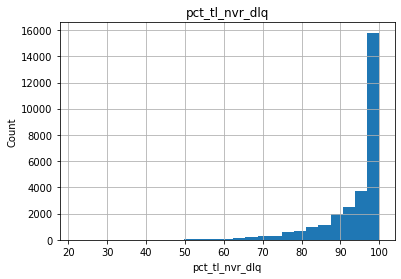

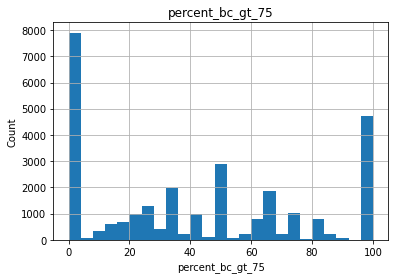

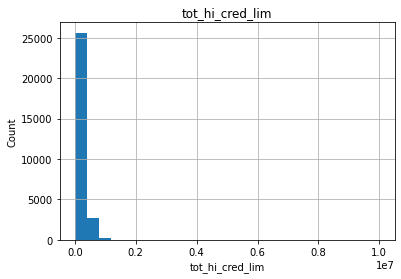

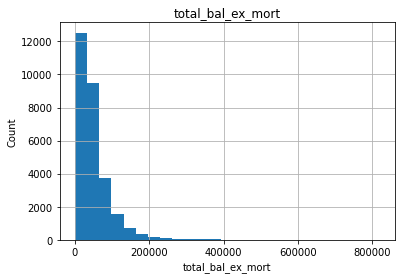

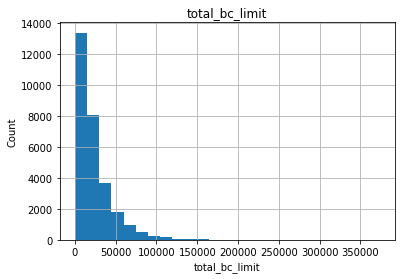

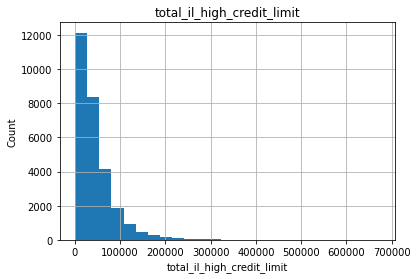

In [ ]:
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

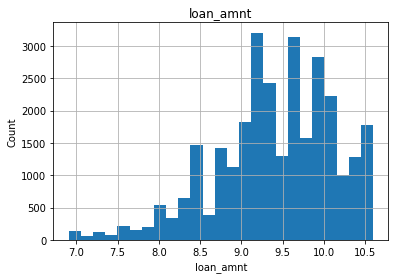

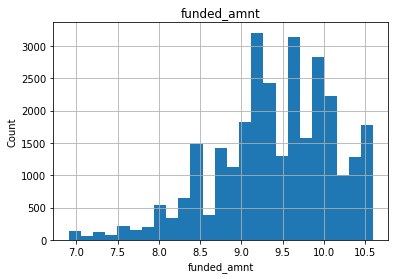

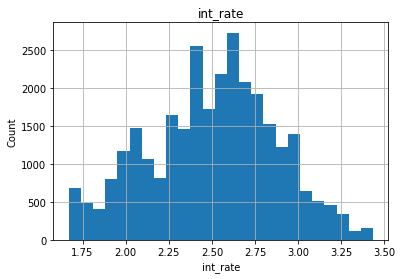

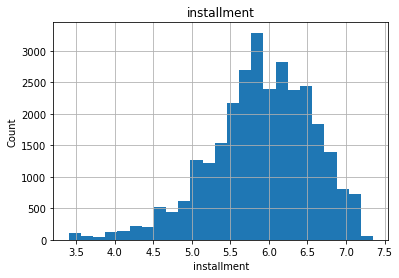

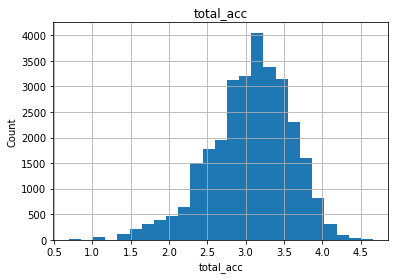

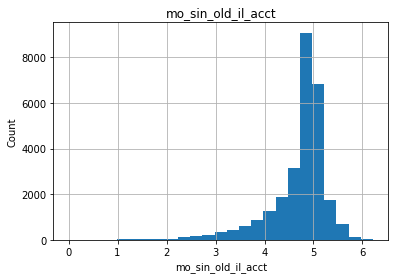

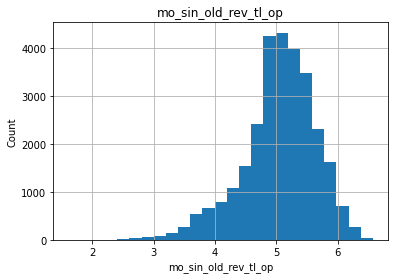

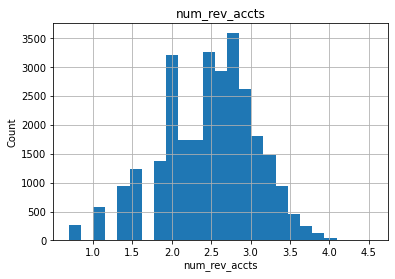

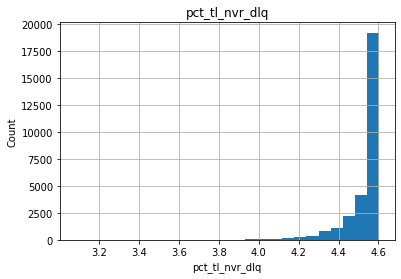

In [ ]:
# using using logarithmic transformation
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()

3. Outliers

---

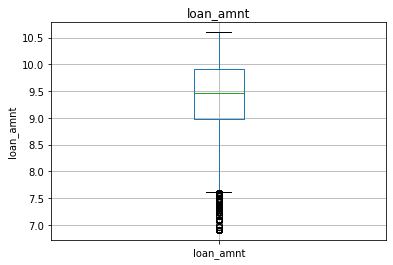

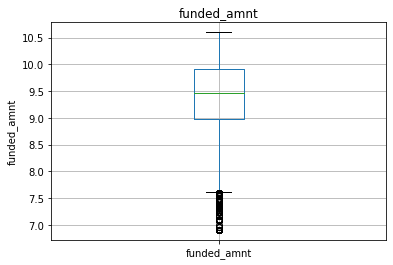

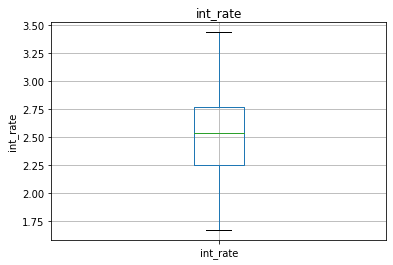

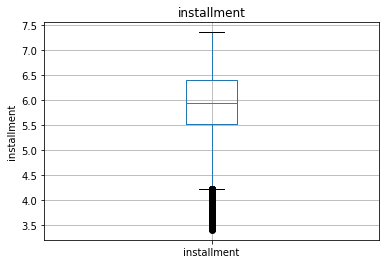

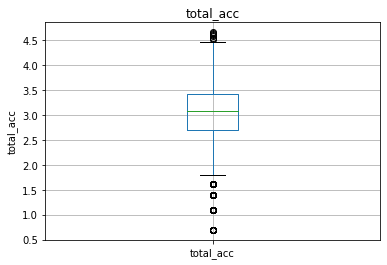

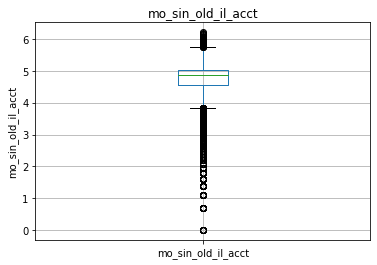

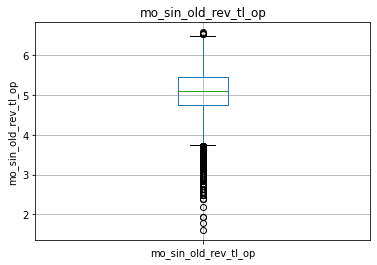

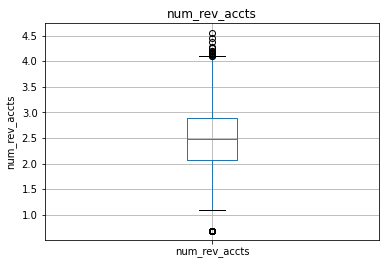

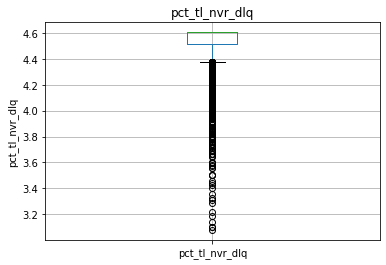

In [ ]:
#cheking outliers in continuous features
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

4. Categorical Feature

---

In [ ]:
# list of categorical featuure
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'disbursement_method',
 'debt_settlement_flag']

In [ ]:
#showing the record of categorical feature
dataset[categorical_features].head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,disbursement_method,debt_settlement_flag
0,60 months,D,D1,Product Regulatory Specialist,< 1 year,MORTGAGE,Verified,Jan-2017,Fully Paid,n,debt_consolidation,Debt consolidation,460xx,IN,Oct-1997,w,Nov-2017,NaN,Dec-2018,Joint App,Cash,N
1,60 months,B,B3,Ass't Manger,10+ years,MORTGAGE,Verified,Aug-2017,Current,n,credit_card,Credit card refinancing,359xx,AL,Aug-1974,f,Feb-2019,Mar-2019,Feb-2019,Individual,Cash,N
2,36 months,A,A5,Project Manager,< 1 year,RENT,Not Verified,Nov-2013,Fully Paid,n,debt_consolidation,Debt consolidation,752xx,TX,Aug-2001,w,Nov-2016,NaN,Sep-2018,Individual,Cash,N
3,60 months,C,C4,Freight Cordinator,10+ years,RENT,Source Verified,Sep-2018,Current,n,debt_consolidation,Debt consolidation,958xx,CA,Oct-2006,w,Feb-2019,Mar-2019,Feb-2019,Joint App,Cash,N
4,36 months,D,D3,Loan and Member Services II,5 years,RENT,Source Verified,Apr-2018,Current,n,other,Other,117xx,NY,Mar-2003,w,Feb-2019,Mar-2019,Feb-2019,Individual,Cash,N


In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is term and number of categories are 2
The feature is grade and number of categories are 7
The feature is sub_grade and number of categories are 35
The feature is emp_title and number of categories are 14811
The feature is emp_length and number of categories are 12
The feature is home_ownership and number of categories are 6
The feature is verification_status and number of categories are 3
The feature is issue_d and number of categories are 132
The feature is loan_status and number of categories are 3
The feature is pymnt_plan and number of categories are 1
The feature is purpose and number of categories are 14
The feature is title and number of categories are 1466
The feature is zip_code and number of categories are 859
The feature is addr_state and number of categories are 50
The feature is earliest_cr_line and number of categories are 593
The feature is initial_list_status and number of categories are 2
The feature is last_pymnt_d and number of categories are 117
The fea

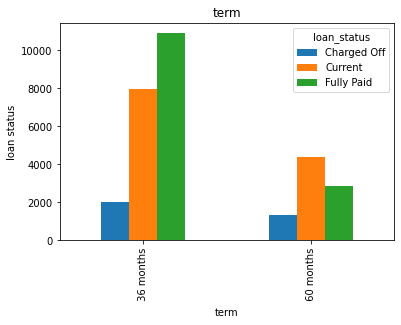

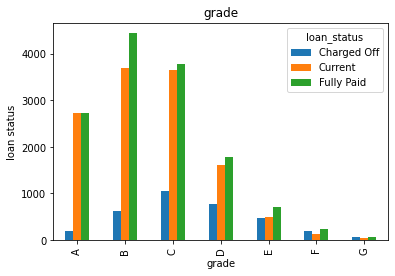

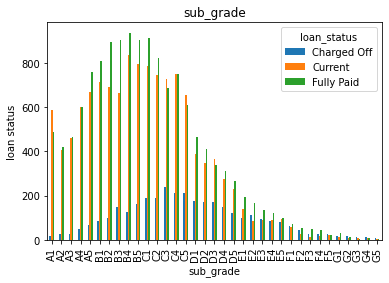

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


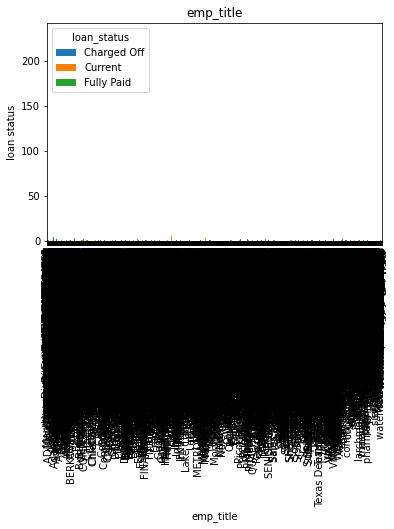

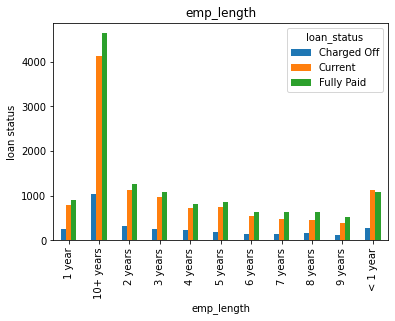

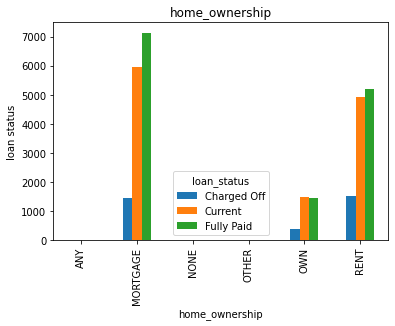

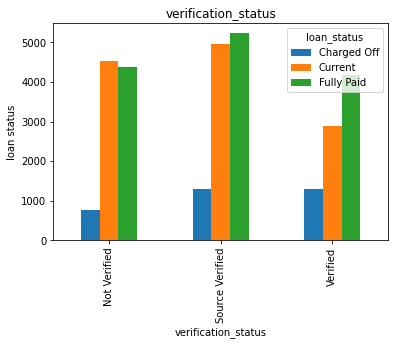

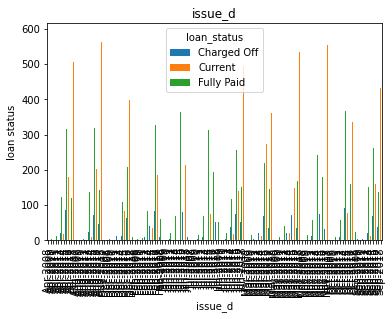

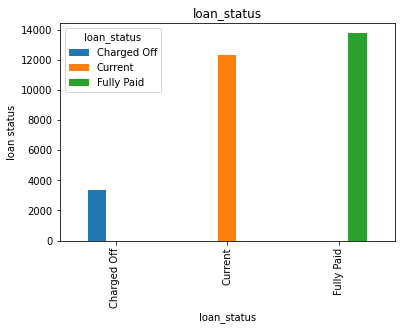

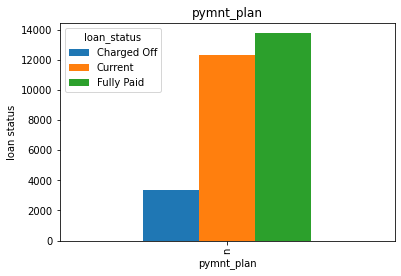

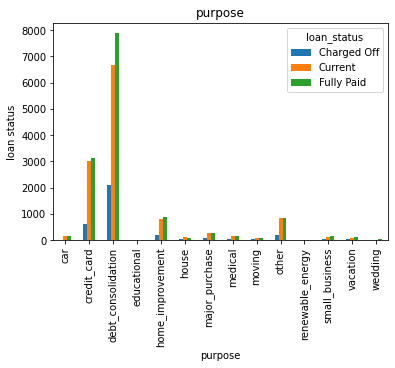

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


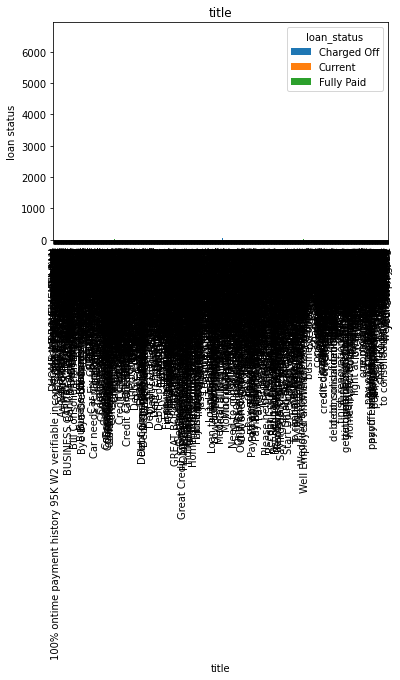

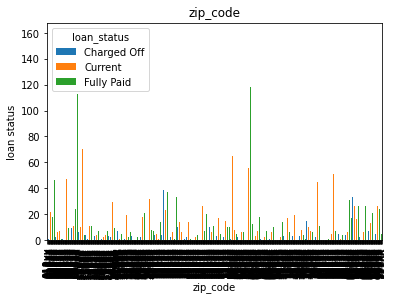

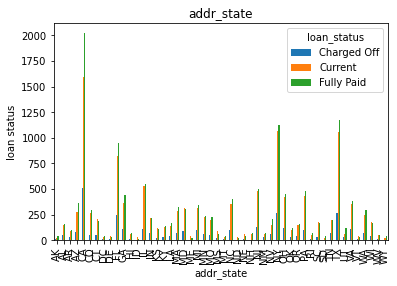

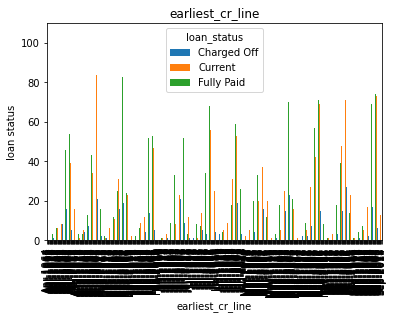

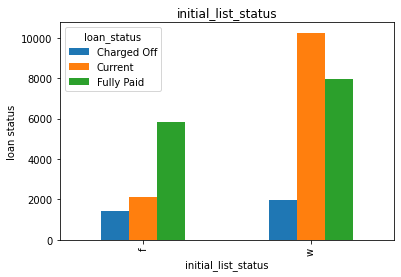

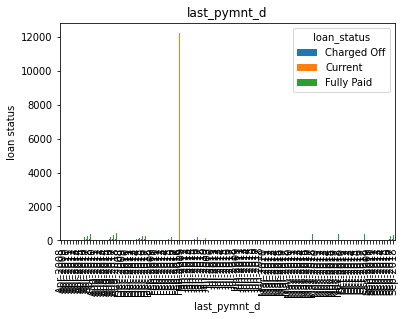

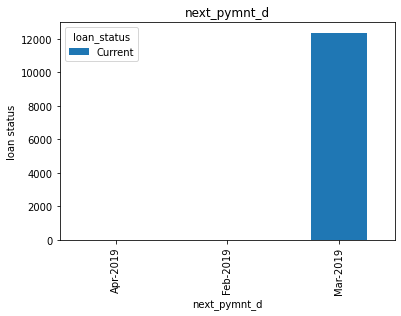

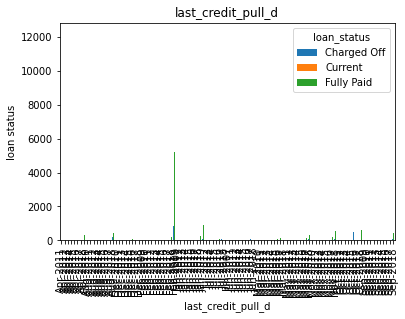

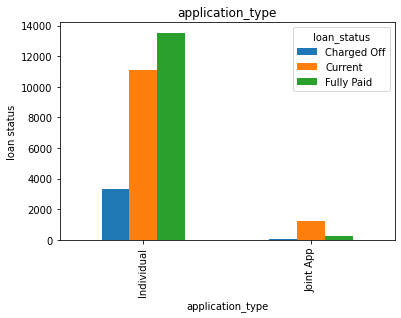

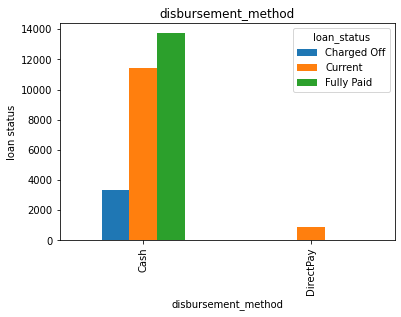

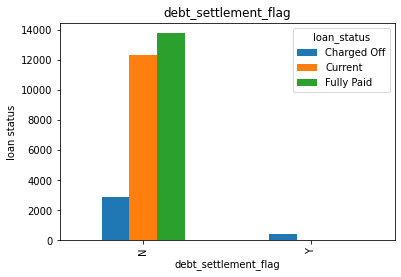

In [ ]:
# Finding the relationship between categorical variable and dependent feature
for feature in categorical_features:
    data=dataset.copy()
    pd.crosstab(data[feature],data.loan_status).plot.bar()
    plt.xlabel(feature)
    plt.ylabel('loan status')
    plt.title(feature)
    plt.show()

**Feature Engineering**

---
1. Temporal Feature
2. Missing Values
    1. Categorical
    2. Numerical
3. NUmerical Feature
4. Categorical Feature
  1. Label Encoder
  2. One Hot Encoder
4. Fetaure Scaling


Data Spliting

---
Before feature engineering, spliting the dataset into train and test set


In [ ]:
# import requires libraries
from sklearn.model_selection import train_test_split

In [ ]:
# spliting into train and test set
X_train,X_test,y_train,y_test=train_test_split(dataset,dataset['loan_status'],test_size=0.3,random_state=0)

In [ ]:
# checking the shape of trian and test data set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20652, 106)
(8851, 106)
(20652,)
(8851,)


1. Temporal Feature

---

In [ ]:
#import required libraries
from dateutil.parser import parse
from dateutil.relativedelta import *
import datetime

In [ ]:
#replace temporal variable
year_feature = ['earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
def replace_temp_feature (dataset, year_feature):
  dataset[year_feature] = dataset[year_feature].fillna('Feb-2019')
  dataset['issue_d']  = [(parse(dt) + relativedelta(years=+1)) for dt in dataset['issue_d']]
  for feature in year_feature:
    dataset[feature]  = [parse(str(dt)) for dt in dataset[feature]]
    dataset[feature]  = ((dataset['issue_d'] - dataset[feature]).dt.days)/30
  dataset['issue_d']= ((datetime.datetime.now()- dataset['issue_d']).dt.days)/30 
  return dataset

In [ ]:
X_train = replace_temp_feature(X_train, year_feature)
X_test  = replace_temp_feature(X_test, year_feature)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [ ]:
#show top 5 record
X_train[year_feature + ['issue_d']].head()

,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d,issue_d
12945,213.000000,-2.033333,-9.133333,-6.133333,30.500000
3709,412.900000,5.066667,4.066667,5.066667,16.300000
16883,284.066667,-25.400000,-42.600000,-42.600000,63.966667
23712,192.766667,-6.066667,-7.066667,-6.066667,27.433333
19008,181.566667,10.166667,9.166667,10.166667,11.200000


2. Missing Values

---
  1. Categorical Geature
  2. Numerical Feature

In [ ]:
# list of all the nan values in categorical features
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']
features_nan

['emp_title', 'emp_length', 'title', 'last_pymnt_d', 'next_pymnt_d']

In [ ]:
# Replace missing value with a new label
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data
X_train=replace_cat_feature(X_train,features_nan)
X_test=replace_cat_feature(X_test,features_nan)

In [ ]:
#cross checking categorical feature nan values in the dataset
X_train[features_nan].isnull().sum()

emp_title       0
emp_length      0
title           0
last_pymnt_d    0
next_pymnt_d    0
dtype: int64

In [ ]:
#show top 5 record
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag
12945,10000,10000,10000.0,36 months,9.93,322.35,B,B2,Area Director,10+ years,RENT,100000.0,Verified,30.500000,Fully Paid,n,credit_card,Credit card refinancing,917xx,CA,32.13,0,213.000000,0,27.0,NaN,8,0,8194,92.0,25,w,0.00,0.00,10873.396672,10873.40,10000.00,873.40,0.0,0.0,0.0,-2.033333,1238.37,-9.133333,-6.133333,0.0,25.0,1,Individual,0,0.0,37646.0,0.0,3.0,0.0,1.0,17.0,29452.0,53.0,0.0,1.0,3201.0,92.0,8950.0,0.0,0.0,0.0,2.0,4705.0,1790.0,92.0,0.0,0,164.0,198.0,20.0,17.0,0.0,20.0,NaN,20.0,25.0,0.0,5.0,5.0,8.0,8.0,9.0,5.0,16.0,4.0,8.0,NaN,0.0,0.0,0.0,96.0,60.0,0.0,0.0,64069.0,37646.0,8950.0,55119.0,Cash,N
3709,22000,22000,22000.0,36 months,7.46,683.94,A,A4,Operations Manager,10+ years,MORTGAGE,112000.0,Source Verified,16.300000,Current,n,credit_card,Credit card refinancing,970xx,OR,18.47,0,412.900000,0,NaN,NaN,7,0,51505,89.6,15,w,18097.61,18097.61,4773.900000,4773.90,3902.39,871.51,0.0,0.0,0.0,5.066667,683.94,4.066667,5.066667,0.0,NaN,1,Individual,0,0.0,392999.0,1.0,1.0,1.0,1.0,6.0,49505.0,NaN,0.0,1.0,8624.0,90.0,57500.0,0.0,8.0,0.0,2.0,56143.0,3856.0,69.2,0.0,0,145.0,394.0,22.0,6.0,2.0,34.0,NaN,NaN,NaN,0.0,2.0,5.0,2.0,3.0,5.0,5.0,8.0,5.0,7.0,0.0,0.0,0.0,1.0,100.0,50.0,0.0,0.0,424315.0,101010.0,12500.0,52315.0,Cash,N
16883,25000,25000,25000.0,36 months,6.49,766.12,A,A2,President,7 years,MORTGAGE,180000.0,Source Verified,63.966667,Fully Paid,n,credit_card,Credit card refinancing,908xx,CA,11.18,0,284.066667,0,40.0,20.0,13,3,19977,46.0,26,f,0.00,0.00,27582.720313,27582.72,25000.00,2582.72,0.0,0.0,0.0,-25.400000,2.40,-42.600000,-42.600000,0.0,NaN,1,Individual,0,0.0,629649.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43400.0,NaN,NaN,NaN,2.0,48435.0,16595.0,45.4,0.0,0,238.0,268.0,21.0,2.0,5.0,89.0,65.0,NaN,40.0,0.0,3.0,5.0,4.0,5.0,8.0,7.0,12.0,5.0,13.0,0.0,0.0,0.0,1.0,92.3,50.0,0.0,3.0,727206.0,75489.0,30400.0,75119.0,Cash,N
23712,10000,10000,9750.0,36 months,10.91,326.97,B,B4,Data Engineer,1 year,RENT,86000.0,Not Verified,27.433333,Current,n,debt_consolidation,Debt consolidation,300xx,GA,16.68,0,192.766667,3,NaN,NaN,12,0,19140,21.0,26,f,5406.21,5271.05,5879.400000,5732.41,4593.79,1285.61,0.0,0.0,0.0,-6.066667,326.97,-7.066667,-6.066667,0.0,NaN,1,Individual,0,0.0,92245.0,5.0,2.0,2.0,2.0,2.0,73105.0,98.0,3.0,4.0,9654.0,39.0,91000.0,0.0,3.0,3.0,6.0,8386.0,52661.0,21.4,0.0,0,120.0,178.0,2.0,2.0,0.0,2.0,NaN,2.0,NaN,0.0,5.0,9.0,6.0,8.0,11.0,10.0,15.0,9.0,12.0,0.0,0.0,0.0,5.0,100.0,20.0,0.0,0.0,164642.0,92245.0,67000.0,73642

In [ ]:
# list of all numerical variables which contains missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']
numerical_with_nan

['dti',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'revol_util',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m'

In [ ]:
## Replacing the numerical Missing Values
def replace_num_feature(dataset,features_nan):
  for feature in numerical_with_nan:
    mean_value=dataset[feature].mean()
    dataset[feature].fillna(mean_value,inplace=True)
  return dataset 

X_train=replace_num_feature(X_train,numerical_with_nan)
X_test=replace_num_feature(X_test,numerical_with_nan)

In [ ]:
# cross checking the missing values in numerical feture
X_train[numerical_with_nan].isnull().sum()

dti                               0
mths_since_last_delinq            0
mths_since_last_record            0
revol_util                        0
collections_12_mths_ex_med        0
mths_since_last_major_derog       0
tot_coll_amt                      0
tot_cur_bal                       0
open_acc_6m                       0
open_act_il                       0
open_il_12m                       0
open_il_24m                       0
mths_since_rcnt_il                0
total_bal_il                      0
il_util                           0
open_rv_12m                       0
open_rv_24m                       0
max_bal_bc                        0
all_util                          0
total_rev_hi_lim                  0
inq_fi                            0
total_cu_tl                       0
inq_last_12m                      0
acc_open_past_24mths              0
avg_cur_bal                       0
bc_open_to_buy                    0
bc_util                           0
chargeoff_within_12_mths    

In [ ]:
#showing the top 5 record
X_train.head(50)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag
12945,10000,10000,10000.0,36 months,9.93,322.35,B,B2,Area Director,10+ years,RENT,100000.00,Verified,30.500000,Fully Paid,n,credit_card,Credit card refinancing,917xx,CA,32.13,0,213.000000,0,27.000000,71.631642,8,0,8194,92.0,25,w,0.00,0.00,10873.396672,10873.40,10000.00,873.40,0.00,0.0,0.0,-2.033333,1238.37,-9.133333,-6.133333,0.0,25.000000,1,Individual,0,0.000000,37646.000000,0.000000,3.000000,0.00000,1.000000,17.000000,29452.000000,53.00000,0.000000,1.000000,3201.000000,92.000000,8950.000000,0.000000,0.000000,0.000000,2.0,4705.000000,1790.000000,92.000000,0.0,0,164.000000,198.000000,20.000000,17.000000,0.0,20.000000,39.224601,20.000000,25.000000,0.000000,5.000000,5.00000,8.000000,8.000000,9.000000,5.000000,16.000000,4.000000,8.00000,0.000518,0.000000,0.000000,0.000000,96.000000,60.000000,0.0,0.0,64069.000000,37646.0,8950.0,55119.000000,Cash,N
3709,22000,22000,22000.0,36 months,7.46,683.94,A,A4,Operations Manager,10+ years,MORTGAGE,112000.00,Source Verified,16.300000,Current,n,credit_card,Credit card refinancing,970xx,OR,18.47,0,412.900000,0,34.416111,71.631642,7,0,51505,89.6,15,w,18097.61,18097.61,4773.900000,4773.90,3902.39,871.51,0.00,0.0,0.0,5.066667,683.94,4.066667,5.066667,0.0,44.556636,1,Individual,0,0.000000,392999.000000,1.000000,1.000000,1.00000,1.000000,6.000000,49505.000000,69.14689,0.000000,1.000000,8624.000000,90.000000,57500.000000,0.000000,8.000000,0.000000,2.0,56143.000000,3856.000000,69.200000,0.0,0,145.000000,394.000000,22.000000,6.000000,2.0,34.000000,39.224601,7.006195,35.763987,0.000000,2.000000,5.00000,2.000000,3.000000,5.000000,5.000000,8.000000,5.000000,7.00000,0.000000,0.000000,0.000000,1.000000,100.000000,50.000000,0.0,0.0,424315.000000,101010.0,12500.0,52315.000000,Cash,N
16883,25000,25000,25000.0,36 months,6.49,766.12,A,A2,President,7 years,MORTGAGE,180000.00,Source Verified,63.966667,Fully Paid,n,credit_card,Credit card refinancing,908xx,CA,11.18,0,284.066667,0,40.000000,20.000000,13,3,19977,46.0,26,f,0.00,0.00,27582.720313,27582.72,25000.00,2582.72,0.00,0.0,0.0,-25.400000,2.40,-42.600000,-42.600000,0.0,44.556636,1,Individual,0,0.000000,629649.000000,0.944299,2.779418,0.65413,1.529715,21.495456,35300.423391,69.14689,1.325637,2.794335,5846.005396,56.877162,43400.000000,1.028406,1.443386,2.048004,2.0,48435.000000,16595.000000,45.400000,0.0,0,238.000000,268.000000,21.000000,2.000000,5.0,89.000000,65.000000,7.006195,40.000000,0.000000,3.000000,5.00000,4.000000,5.000000,8.000000,7.000000

3. Numerical Variable

---

In [ ]:
#numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

In [ ]:
#for feature in numerical_features:
   #X_train[feature]=np.log(X_train[feature])

4. Categorical Variable

---
1. Label Encoder
2. One Hot Encoder

In [ ]:
#list of all categorical feature
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O' and feature not in year_feature+['issue_d']]
categorical_features

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'initial_list_status',
 'application_type',
 'disbursement_method',
 'debt_settlement_flag']

In [ ]:
'''def mark_rare(dataset, categorical_features):
  for feature in categorical_features:
    temp=dataset.groupby(feature)['loan_status'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df), dataset[feature],'Rare_var')
  return dataset
  '''

"def mark_rare(dataset, categorical_features):\n  for feature in categorical_features:\n    temp=dataset.groupby(feature)['loan_status'].count()/len(dataset)\n    temp_df=temp[temp>0.01].index\n    dataset[feature]=np.where(dataset[feature].isin(temp_df), dataset[feature],'Rare_var')\n  return dataset\n  "

In [ ]:
#X_train = mark_rare(X_train,categorical_features)
#X_test  = mark_rare(X_test,categorical_features)

Label Encoder

---

In [ ]:
# import the required libraries
from sklearn.preprocessing import LabelEncoder

In [ ]:
def label_encoder(dataset, categorical_features ):
  labelencoder = LabelEncoder()
  for feature in categorical_features:
    dataset[feature] = labelencoder.fit_transform(dataset[feature])
  return dataset
X_train  = label_encoder(X_train,categorical_features)
X_test  = label_encoder(X_test,categorical_features)

In [ ]:
y_train  = X_train['loan_status'].copy()
y_test  = X_test['loan_status'].copy()

In [ ]:
y_train.head()

12945    2
3709     1
16883    2
23712    1
19008    1
Name: loan_status, dtype: int64

In [ ]:
#checking the top 5 record
X_train[categorical_features].head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,initial_list_status,application_type,disbursement_method,debt_settlement_flag
12945,0,1,6,493,1,5,2,2,0,1,276,774,4,1,0,0,0
3709,0,0,3,5877,1,1,1,1,0,1,276,822,36,1,0,0,0
16883,0,0,1,6413,7,1,1,2,0,1,276,766,4,0,0,0,0
23712,0,1,8,2311,0,5,0,1,0,2,350,267,10,0,0,0,0
19008,0,0,1,6090,1,1,1,1,0,2,350,419,14,1,0,0,0


In [ ]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag
12945,10000,10000,10000.0,0,9.93,322.35,1,6,493,1,5,100000.0,2,30.500000,2,0,1,276,774,4,32.13,0,213.000000,0,27.000000,71.631642,8,0,8194,92.0,25,1,0.00,0.00,10873.396672,10873.40,10000.00,873.40,0.0,0.0,0.0,-2.033333,1238.37,-9.133333,-6.133333,0.0,25.000000,1,0,0,0.0,37646.0,0.000000,3.000000,0.00000,1.000000,17.000000,29452.000000,53.00000,0.000000,1.000000,3201.000000,92.000000,8950.0,0.000000,0.000000,0.000000,2.0,4705.0,1790.0,92.0,0.0,0,164.0,198.0,20.0,17.0,0.0,20.0,39.224601,20.000000,25.000000,0.0,5.0,5.0,8.0,8.0,9.0,5.0,16.0,4.0,8.0,0.000518,0.0,0.0,0.0,96.0,60.0,0.0,0.0,64069.0,37646.0,8950.0,55119.0,0,0
3709,22000,22000,22000.0,0,7.46,683.94,0,3,5877,1,1,112000.0,1,16.300000,1,0,1,276,822,36,18.47,0,412.900000,0,34.416111,71.631642,7,0,51505,89.6,15,1,18097.61,18097.61,4773.900000,4773.90,3902.39,871.51,0.0,0.0,0.0,5.066667,683.94,4.066667,5.066667,0.0,44.556636,1,0,0,0.0,392999.0,1.000000,1.000000,1.00000,1.000000,6.000000,49505.000000,69.14689,0.000000,1.000000,8624.000000,90.000000,57500.0,0.000000,8.000000,0.000000,2.0,56143.0,3856.0,69.2,0.0,0,145.0,394.0,22.0,6.0,2.0,34.0,39.224601,7.006195,35.763987,0.0,2.0,5.0,2.0,3.0,5.0,5.0,8.0,5.0,7.0,0.000000,0.0,0.0,1.0,100.0,50.0,0.0,0.0,424315.0,101010.0,12500.0,52315.0,0,0
16883,25000,25000,25000.0,0,6.49,766.12,0,1,6413,7,1,180000.0,1,63.966667,2,0,1,276,766,4,11.18,0,284.066667,0,40.000000,20.000000,13,3,19977,46.0,26,0,0.00,0.00,27582.720313,27582.72,25000.00,2582.72,0.0,0.0,0.0,-25.400000,2.40,-42.600000,-42.600000,0.0,44.556636,1,0,0,0.0,629649.0,0.944299,2.779418,0.65413,1.529715,21.495456,35300.423391,69.14689,1.325637,2.794335,5846.005396,56.877162,43400.0,1.028406,1.443386,2.048004,2.0,48435.0,16595.0,45.4,0.0,0,238.0,268.0,21.0,2.0,5.0,89.0,65.000000,7.006195,40.000000,0.0,3.0,5.0,4.0,5.0,8.0,7.0,12.0,5.0,13.0,0.000000,0.0,0.0,1.0,92.3,50.0,0.0,3.0,727206.0,75489.0,30400.0,75119.0,0,0
23712,10000,10000,9750.0,0,10.91,326.97,1,8,2311,0,5,86000.0,0,27.433333,1,0,2,350,267,10,16.68,0,192.766667,3,34.416111,71.631642,12,0,19140,21.0,26,0,5406.21,5271.05,5879.400000,5732.41,4593.79,1285.61,0.0,0.0,0.0,-6.066667,326.97,-7.066667,-6.066667,0.0,44.556636,1,0,0,0.0,92245.0,5.000000,2.000000,2.00000,2.000000,2.000000,73105.000000,98.00000,3.000000,4.000000,9654.000000,39.000000,91000.0,0.000000,3.000000,3.000000,6.0,8386.0,52661.0,21.4,0.0,0,120.0,178.0,2.0,2.0,0.0,2.0,39.224601,2.000000,35.763987,0.0,5.0,9.0,6.0,8.0,11.0,10.0,15.0,9.0,12.0,0.000000

5. Feature Scaling

---

In [ ]:
#list of ll features
scaling_feature=[feature for feature in dataset.columns]
len(scaling_feature)

106

In [ ]:
#import required libraries
from sklearn.preprocessing import MinMaxScaler


In [ ]:
def scal_feature(dataset, scaling_feature):
  scaler=MinMaxScaler()
  scaler.fit(dataset[scaling_feature])
  dataset[scaling_feature] = scaler.transform(dataset[scaling_feature])

In [ ]:
scal_feature(X_train,scaling_feature)
scal_feature(X_test,scaling_feature)

In [ ]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag
12945,0.230769,0.230769,0.25000,0.0,0.179907,0.191422,0.166667,0.176471,0.044798,0.090909,1.0,0.020833,1.0,0.138849,1.0,0.0,0.076923,0.251825,0.912736,0.081633,0.073561,0.0,0.236701,0.000000,0.169811,0.591997,0.129032,0.000000,0.012243,0.645614,0.221154,1.0,0.000000,0.000000,0.178128,0.178128,0.250000,0.032833,0.0,0.0,0.0,0.875836,0.030049,0.861151,0.862884,0.0,0.157233,0.0,0.0,0.0,0.0,0.012235,0.000000,0.093750,0.000000,0.076923,0.057432,0.036995,0.288043,0.000000,0.018868,0.040293,0.534884,0.013028,0.000000,0.000000,0.000000,0.037037,0.013871,0.004799,0.489622,0.0,0.0,0.332653,0.271067,0.075758,0.066667,0.000000,0.044444,0.246696,0.833333,0.157233,0.0,0.208333,0.125,0.235294,0.173913,0.093750,0.086207,0.166667,0.100,0.129032,0.000518,0.0,0.0,0.000000,0.948914,0.6,0.0,0.000000,0.006407,0.045958,0.023988,0.081949,0.0,0.0
3709,0.538462,0.538462,0.55000,0.0,0.083723,0.428277,0.000000,0.088235,0.534030,0.090909,0.2,0.023333,0.5,0.036691,0.5,0.0,0.076923,0.251825,0.969340,0.734694,0.042287,0.0,0.526453,0.000000,0.216454,0.591997,0.112903,0.000000,0.076958,0.628772,0.125000,1.0,0.462953,0.462953,0.078206,0.078206,0.097560,0.032762,0.0,0.0,0.0,0.937773,0.016596,0.956115,0.942317,0.0,0.280230,0.0,0.0,0.0,0.0,0.127729,0.083333,0.031250,0.111111,0.076923,0.020270,0.062184,0.375798,0.000000,0.018868,0.108554,0.523256,0.083697,0.000000,0.242424,0.000000,0.037037,0.165516,0.010338,0.368281,0.0,0.0,0.293878,0.546348,0.083333,0.023529,0.105263,0.075556,0.246696,0.291925,0.224931,0.0,0.083333,0.125,0.058824,0.065217,0.052083,0.086207,0.071429,0.125,0.112903,0.000000,0.0,0.0,0.055556,1.000000,0.5,0.0,0.000000,0.042432,0.123313,0.033503,0.077780,0.0,0.0
16883,0.615385,0.615385,0.62500,0.0,0.045950,0.482108,0.000000,0.029412,0.582735,0.636364,0.2,0.037500,0.5,0.379616,1.0,0.0,0.076923,0.251825,0.903302,0.081633,0.025596,0.0,0.339711,0.000000,0.251572,0.165289,0.209677,0.272727,0.029850,0.322807,0.230769,0.0,0.000000,0.000000,0.451861,0.451861,0.625000,0.097091,0.0,0.0,0.0,0.671998,0.000058,0.620384,0.604255,0.0,0.280230,0.0,0.0,0.0,0.0,0.204643,0.078692,0.086857,0.072681,0.117670,0.072620,0.044341,0.375798,0.073646,0.052723,0.073586,0.330681,0.063173,0.038089,0.043739,0.073143,0.037037,0.142792,0.044490,0.241618,0.0,0.0,0.483673,0.369382,0.079545,0.007843,0.263158,0.197778,0.408805,0.291925,0.251572,0.0,0.125000,0.125,0.117647,0.108696,0.083333,0.120690,0.119048,0.125,0.209677,0.000000,0.0,0.0,0.055556,0.901660,0.5,0.0,0.272727,0

**Feature Selection**

---
1. Heat Map (correlation)
2. Lasso and feature_selection (coefficient)
---


1. Heat Map

---

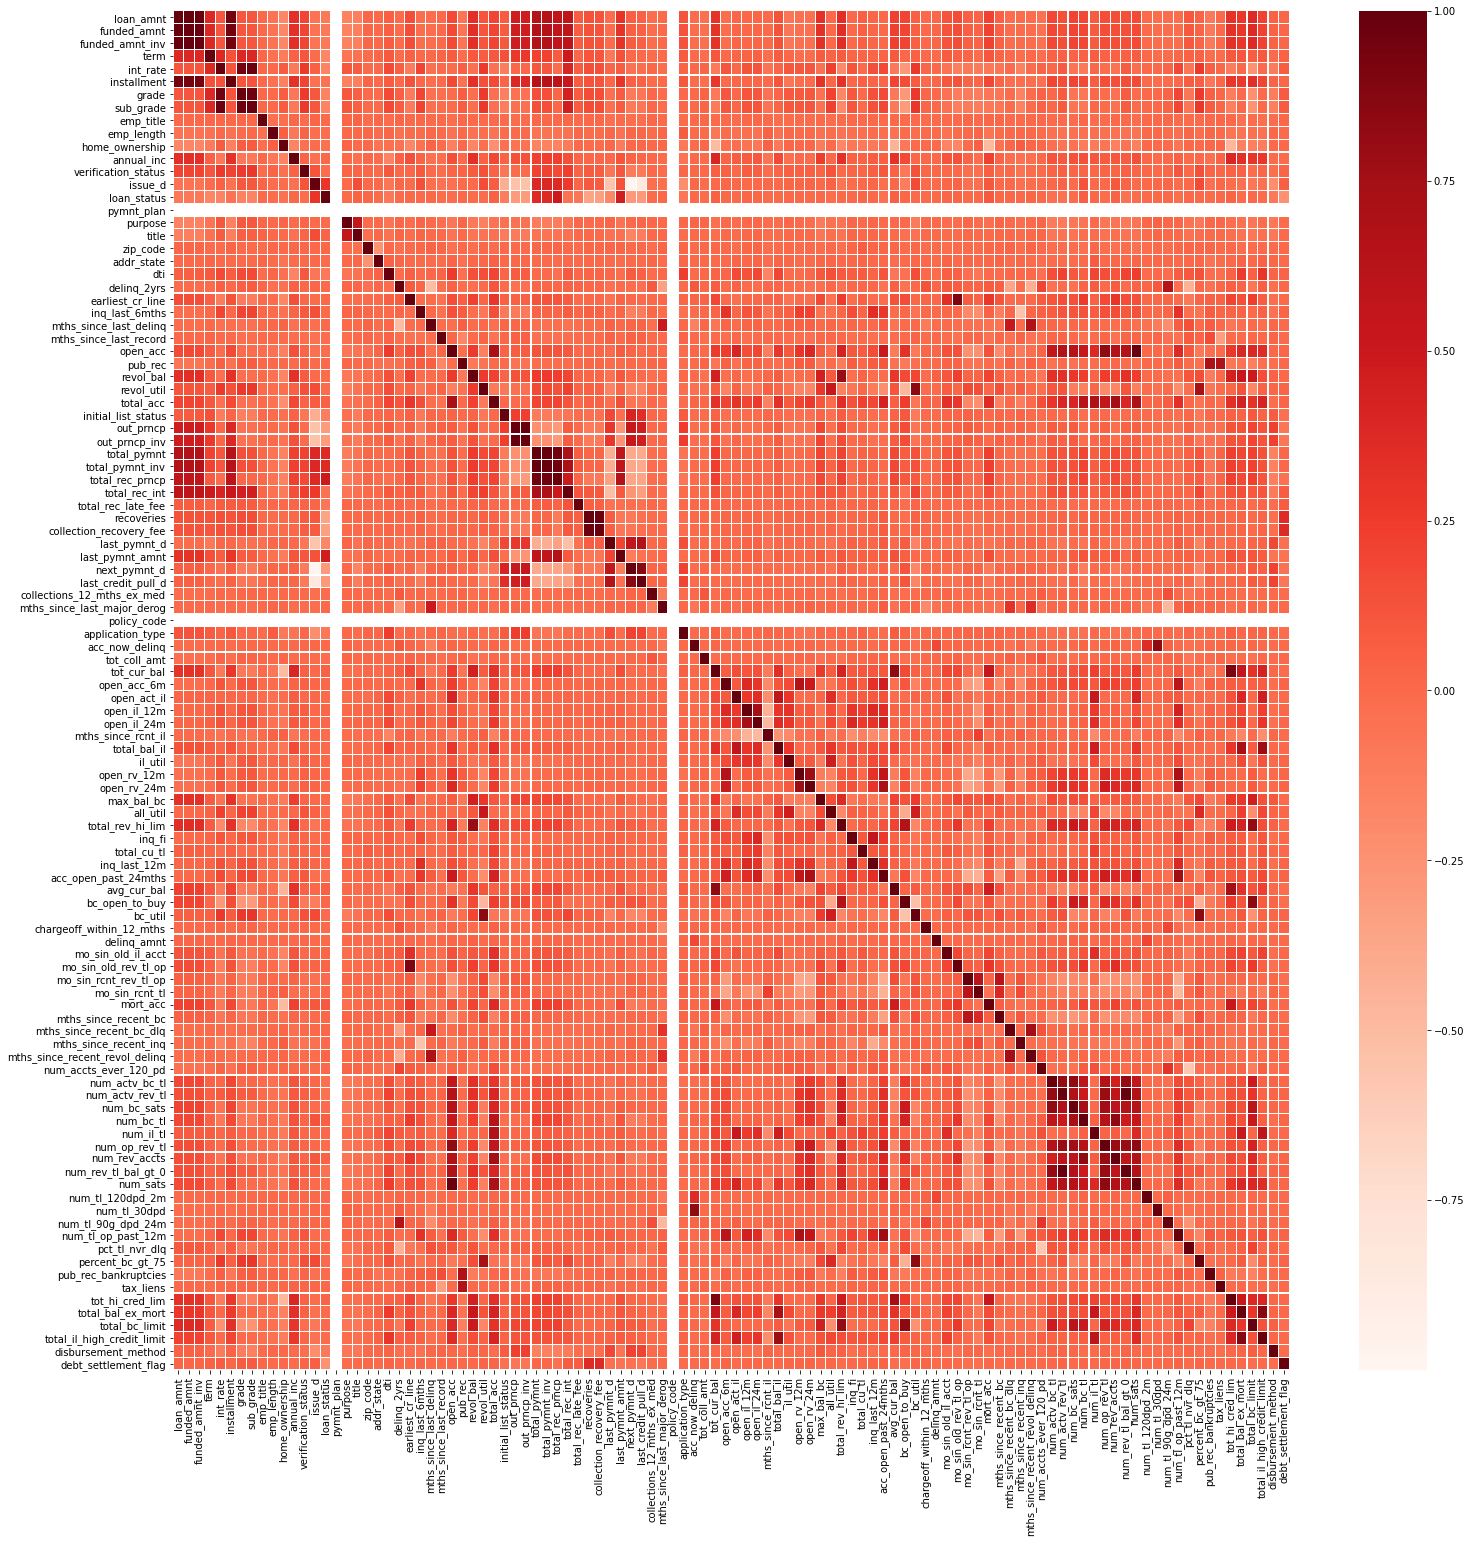

In [ ]:
# checking feature corelation 
plt.figure(figsize = (25,25))
corr = X_train.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [ ]:
corr

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag
loan_amnt,1.000000,0.999812,0.999250,0.390509,0.103810,0.945891,0.106168,0.106977,0.002720,-0.059294,-0.184566,0.328956,0.201018,-0.059929,-0.090105,NaN,-0.154656,-0.132683,0.019492,0.005176,0.062067,-0.008816,0.154303,-0.020024,-0.018177,0.006638,0.179170,-0.065430,0.337070,0.115280,0.197119,0.085234,0.471244,0.471258,0.649971,0.649981,0.575212,0.583251,0.066409,0.125954,0.121966,-0.016196,0.310089,0.058881,0.047449,-0.017045,-0.006548,NaN,0.120979,-0.013904,-0.031960,0.310075,-0.015720,0.028275,0.009474,0.021007,-0.003103,0.126269,-0.073986,-0.036981,-0.032507,0.327113,0.002930,0.346646,0.007484,0.055432,0.017238,0.002125,0.231532,0.198484,0.057990,0.001388,0.018438,0.123170,0.158003,0.059161,0.032389,0.217211,0.048066,-0.023101,-0.012986,-0.022933,-0.051021,0.185269,0.146728,0.203337,0.186587,0.080622,0.151610,0.152616,0.144840,0.175077,-0.000087,-0.021274,-0.019077,-0.019037,0.087321,0.032631,-0.091711,0.006924,0.312812,0.280767,0.368076,0.211927,0.046181,0.021617
funded_amnt,0.999812,1.000000,0.999468,0.390224,0.103918,0.946170,0.106192,0.106941,0.002720,-0.059082,-0.184427,0.328915,0.200742,-0.061595,-0.090222,NaN,-0.154988,-0.133267,0.019463,0.005089,0.062299,-0.008747,0.154400,-0.020083,-0.018208,0.006639,0.179275,-0.065246,0.337043,0.115602,0.196939,0.086004,0.471588,0.471602,0.649888,0.649930,0.575130,0.583203,0.066455,0.125937,0.121974,-0.015771,0.310087,0.060560,0.048453,-0.016985,-0.006548,NaN,0.121111,-0.013875,-0.031963,0.310101,-0.015722,0.028278,0.009475,0.021008,-0.003104,0.126280,-0.073992,-0.036984,-0.032510,0.327141,0.002931,0.346676,0.007484,0.055437,0.017239,0.002125,0.231551,0.198501,0.057995,0.001431,0.018446,0.123180,0.158016,0.059166,0.032391,0.217229,0.048070,-0.023103,-0.012987,-0.022935,-0.051025,0.185285,0.146741,0.203354,0.186603,0.080628,0.151623,0.152629,0.144852,0.175092,-0.000087,-0.021276,-0.019078,-0.019039,0.087329,0.032634,-0.091533,0.006996,0.312838,0.280790,0.368107,0.211945,0.046281,0.021683
funded_amnt_inv,0.999250,0.999468,1.000000,0.390239,0.103881,0.945612,0.105818,0.106426,0.002678,-0.058813,-0.184326,0.328641,0.200359,-0.065757,-0.090762,NaN,-0.155580,-0.133423,0.019816,0.004846,0.062829,-0.008552,0.154529,-0.020228,-0.018021,0.007617,0.179502,-0.065198,0.336869,0.115687,0.196954,0.088336,0.472241,0.472258,0.648565,0.649901,0.573962,0.581907,0.066492,0.126010,0.122051,-0.014714,0.309794,0.064760,0.051258,-0.016833,-0.006532,NaN,0.121345,-0.013879,-0.031956,0.31002

2. Lasso and feature_selection

---

In [ ]:
#import the required libraries for feature selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
## drop dependent feature from dataset
X_train=X_train.drop(['loan_status'],axis=1)
X_test=X_test.drop(['loan_status'],axis=1)

In [ ]:
#initializing the model parameters
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4386373046099834, tolerance: 0.4017527962942054
  positive)


SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
feature_sel_model.fit(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4386373046099834, tolerance: 0.4017527962942054
  positive)


SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
feature_sel_model.get_support()

array([ True,  True, False,  True, False, False,  True, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False,  True,
        True, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True])

In [ ]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_test.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 105
selected features: 14
features with coefficients shrank to zero: 91


In [ ]:
selected_feat

Index(['loan_amnt', 'funded_amnt', 'term', 'grade', 'verification_status',
       'issue_d', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt',
       'last_credit_pull_d', 'debt_settlement_flag'],
      dtype='object')

In [ ]:
 X_train= X_train[selected_feat]
 X_test = X_test[selected_feat]

In [ ]:
X_train.head()

,loan_amnt,funded_amnt,term,grade,verification_status,issue_d,initial_list_status,out_prncp,out_prncp_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,last_credit_pull_d,debt_settlement_flag
12945,0.230769,0.230769,0.0,0.166667,1.0,0.138849,1.0,0.000000,0.000000,0.250000,0.032833,0.030049,0.862884,0.0
3709,0.538462,0.538462,0.0,0.000000,0.5,0.036691,1.0,0.462953,0.462953,0.097560,0.032762,0.016596,0.942317,0.0
16883,0.615385,0.615385,0.0,0.000000,0.5,0.379616,0.0,0.000000,0.000000,0.625000,0.097091,0.000058,0.604255,0.0
23712,0.230769,0.230769,0.0,0.166667,0.0,0.116787,0.0,0.138296,0.134838,0.114845,0.048329,0.007934,0.863357,0.0
19008,0.179487,0.179487,0.0,0.000000,0.5,0.000000,1.0,0.194370,0.194370,0.010044,0.003357,0.005996,0.978487,0.0


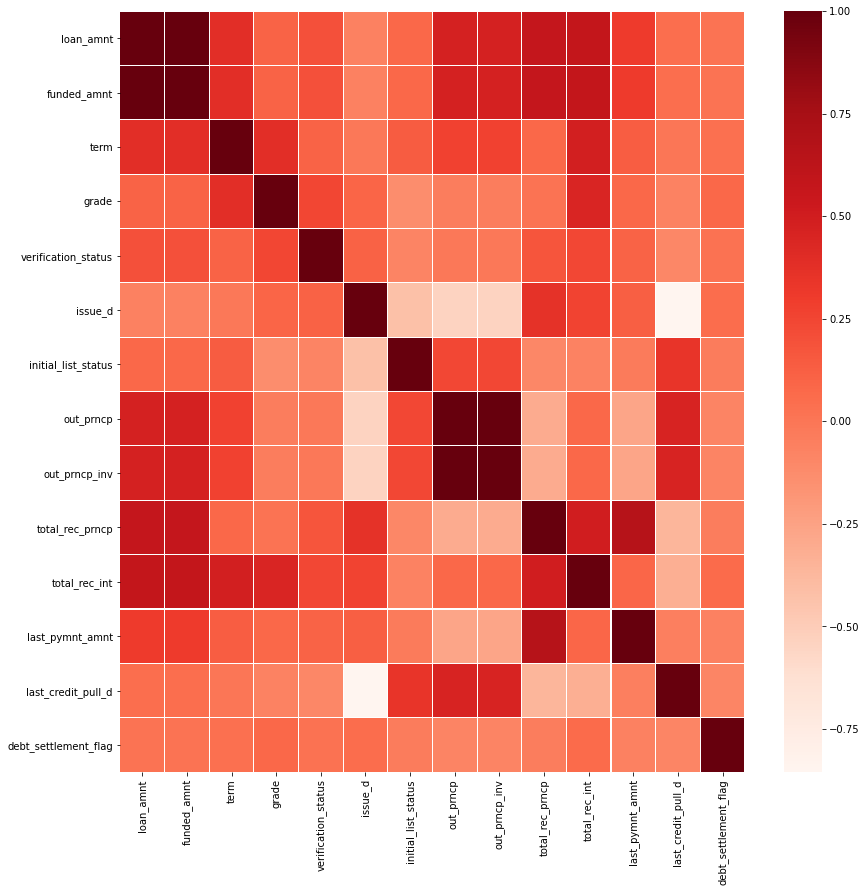

In [ ]:
plt.figure(figsize = (14,14))
corr = X_train.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [ ]:
corr

,loan_amnt,funded_amnt,term,grade,verification_status,issue_d,initial_list_status,out_prncp,out_prncp_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,last_credit_pull_d,debt_settlement_flag
loan_amnt,1.000000,0.999812,0.390509,0.106168,0.201018,-0.059929,0.085234,0.471244,0.471258,0.575212,0.583251,0.310089,0.047449,0.021617
funded_amnt,0.999812,1.000000,0.390224,0.106192,0.200742,-0.061595,0.086004,0.471588,0.471602,0.575130,0.583203,0.310087,0.048453,0.021683
term,0.390509,0.390224,1.000000,0.390325,0.108425,-0.008817,0.137848,0.273019,0.273101,0.085697,0.491568,0.136513,0.002175,0.039204
grade,0.106168,0.106192,0.390325,1.000000,0.252025,0.095898,-0.126727,-0.039197,-0.039167,0.015870,0.447486,0.085443,-0.071280,0.080265
verification_status,0.201018,0.200742,0.108425,0.252025,1.000000,0.112969,-0.072480,-0.011593,-0.011589,0.174942,0.241145,0.101961,-0.098194,0.025644
issue_d,-0.059929,-0.061595,-0.008817,0.095898,0.112969,1.000000,-0.420898,-0.541609,-0.541563,0.369316,0.264450,0.130457,-0.854876,0.055232
initial_list_status,0.085234,0.086004,0.137848,-0.126727,-0.072480,-0.420898,1.000000,0.240847,0.241077,-0.099241,-0.067962,-0.026806,0.349782,-0.033678
out_prncp,0.471244,0.471588,0.273019,-0.039197,-0.011593,-0.541609,0.240847,1.000000,0.999999,-0.297274,0.082149,-0.267973,0.461579,-0.072452
out_prncp_inv,0.471258,0.471602,0.273101,-0.039167,-0.011589,-0.541563,0.241077,0.999999,1.000000,-0.297266,0.082150,-0.267943,0.461544,-0.072444
total_rec_prncp,0.575212,0.575130,0.085697,0.015870,0.174942,0.369316,-0.099241,-0.297274,-0.297266,1.000000,0.501562,0.661135,-0.358566,-0.041371


**Model Building and Validation**

---
1. Logistic regression
2. random Forest
3. Adabost Classifier
---


1. Logistic Regression

---

In [ ]:
# imprt required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_model.score(X_test, y_test)

0.9699468986555192

In [ ]:
# predicting on the test data
preds = lr_model.predict(X_test)

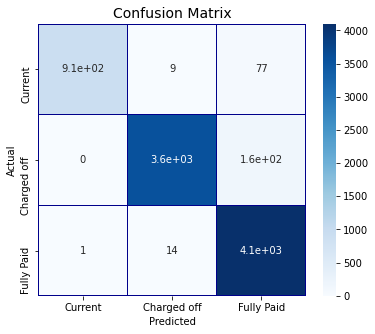

In [ ]:
#visualizing the confusion matrix
cm = pd.crosstab(y_test, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(6,5))
sns.heatmap(cm, 
            xticklabels=['Current', 'Charged off', 'Fully Paid'],
            yticklabels=['Current', 'Charged off', 'Fully Paid'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
# tabular representaion of confusion matrxi
cm

Predicted,0,1,2
Actual,,,
0,914,9,77
1,0,3575,165
2,1,14,4096


In [ ]:
# checking accuracy by accuracy_score 
print(accuracy_score(y_test, preds))

0.9699468986555192


2. Random Forest

---

In [ ]:
#import  required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifie
RANDOM_STATE = 2020

In [ ]:
# intializing the model
random_clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

In [ ]:
# fiting the data into model
random_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=2020, verbose=False,
                       warm_start=False)

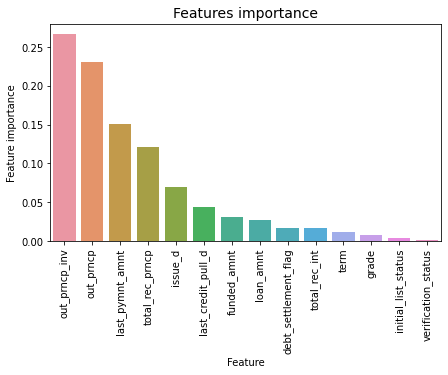

In [ ]:
#checking the feature importnace
tmp = pd.DataFrame({'Feature': selected_feat, 'Feature importance': random_clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [ ]:
# precdion on test data
preds = random_clf.predict(X_test)

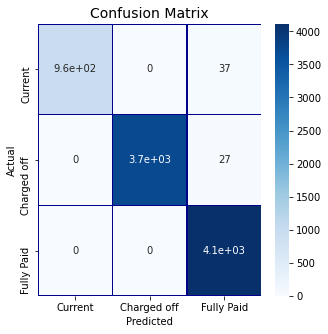

In [ ]:
#visualizing confustion matrix
cm = pd.crosstab(y_test, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Current', 'Charged off', 'Fully Paid'],
            yticklabels=['Current', 'Charged off', 'Fully Paid'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
# tabuler representation of confusion matrix
cm

Predicted,0,1,2
Actual,,,
0,935,0,65
1,29,3679,32
2,26,20,4065


In [ ]:
#checking accuracy using accuracy_score 
print(accuracy_score(y_test, preds))

0.9927691786238843


3. AdaBoost Classifiers

---

In [ ]:
# import required librabies
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# define the model
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                         n_estimators=NUM_ESTIMATORS)

In [ ]:
# fit the value into model
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.8,
                   n_estimators=100, random_state=2020)

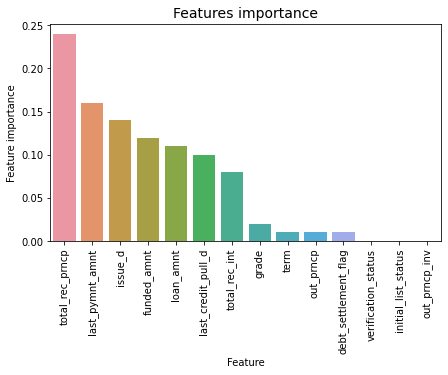

In [ ]:
# check the feature importance
tmp = pd.DataFrame({'Feature': selected_feat, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [ ]:
# predict the test data
preds = clf.predict(X_test)

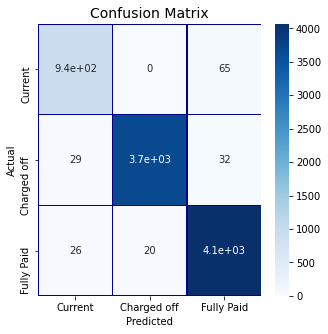

In [ ]:
# Visualizing confusion Matrix
cm = pd.crosstab(y_test, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Current', 'Charged off', 'Fully Paid'],
            yticklabels=['Current', 'Charged off', 'Fully Paid'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
# tabular representation of confusion Matrix
cm

Predicted,0,1,2
Actual,,,
0,935,0,65
1,29,3679,32
2,26,20,4065


In [ ]:
# checking the accuracy using sccuracy_score 
print(accuracy_score(y_test, preds))

0.980567167551689
